In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import autocorrelation_plot
from IPython.display import display, HTML as HTML_display
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input, LSTM, Dense, LayerNormalization, MultiHeadAttention, Concatenate

In [2]:
def show_html_content():
    html_content = '''
    <div style="font-family: Arial, sans-serif; line-height: 1.6; background-color: #f4f4f9; padding: 20px; border-radius: 10px; border: 1px solid #ddd;">
        <h2 style="color: #4CAF50; text-align: center;">🧠 Temporal Fusion Transformer (TFT) 모델 설명</h2>

        <p>
            <strong>Temporal Fusion Transformer (TFT)</strong>는 시계열 예측을 위한 강력한 딥러닝 모델입니다.
            TFT 모델은 시계열 데이터의 복잡한 패턴을 학습하는 데 적합하며, 특히 다양한 시점에서 발생할 수 있는
            중요한 이벤트를 효과적으로 포착하는 데 탁월합니다. 아래에서 TFT 모델의 주요 구성 요소와 그 역할을
            자세히 설명합니다.
        </p>

        <h3 style="color: #2E8B57;">🛠️ TFT 모델 구조 다이어그램</h3>
        <div style="text-align: center;">
            <img src="https://blog.kakaocdn.net/dn/lXt48/btq0LPFDF4W/GmguyQ8bwe1EfB3tri7dx1/img.png" alt="TFT Model Diagram" style="width: 70%; border: 1px solid #ddd; border-radius: 12px; padding: 5px;">
            <p style="font-size: 0.9em; color: #555;">TFT 모델의 전체 구조를 시각화한 다이어그램입니다.</p>
        </div>

        <h3 style="color: #2E8B57;">🔍 TFT 모델의 주요 구성 요소</h3>

        <div style="display: flex; align-items: center; justify-content: space-around; margin-top: 20px;">
            <div style="text-align: center;">
                <div style="width: 120px; height: 120px; background-color: #FFD700; border-radius: 12px; line-height: 120px; font-size: 18px; color: #fff;">Input</div>
                <p style="margin-top: 10px; font-size: 16px;">입력 레이어</p>
            </div>

            <div style="font-size: 24px; color: #4CAF50;">&#8594;</div> <!-- 화살표 추가 -->

            <div style="text-align: center;">
                <div style="width: 120px; height: 120px; background-color: #1E90FF; border-radius: 12px; line-height: 120px; font-size: 18px; color: #fff;">LSTM</div>
                <p style="margin-top: 10px; font-size: 16px;">LSTM 레이어</p>
            </div>

            <div style="font-size: 24px; color: #4CAF50;">&#8594;</div> <!-- 화살표 추가 -->

            <div style="text-align: center;">
                <div style="width: 120px; height: 120px; background-color: #FF6347; border-radius: 12px; line-height: 120px; font-size: 18px; color: #fff;">Attention</div>
                <p style="margin-top: 10px; font-size: 16px;">어텐션 메커니즘</p>
            </div>

            <div style="font-size: 24px; color: #4CAF50;">&#8594;</div> <!-- 화살표 추가 -->

            <div style="text-align: center;">
                <div style="width: 120px; height: 120px; background-color: #32CD32; border-radius: 12px; line-height: 120px; font-size: 18px; color: #fff;">Output</div>
                <p style="margin-top: 10px; font-size: 16px;">출력 레이어</p>
            </div>
        </div>

        <h3 style="color: #2E8B57;">1. 입력 레이어 (Input Layer)</h3>
        <p style="font-size: 16px; color: #333;">
            입력 레이어는 모델이 학습할 데이터를 받아들이는 단계입니다. 시계열 데이터는
            <em>(시퀀스 길이, 피처 수)</em>의 형태로 모델에 입력되며, 각 타임스텝에 여러 피처가 포함될 수 있습니다.
        </p>

        <h3 style="color: #2E8B57;">2. LSTM 레이어 (Long Short-Term Memory)</h3>
        <p style="font-size: 16px; color: #333;">
            LSTM 레이어는 시계열 데이터의 순차적인 특성을 학습하는 역할을 합니다. LSTM은
            과거 정보의 장기 의존성을 포착하여, 시퀀스 내의 중요한 패턴을 학습할 수 있습니다.
            TFT 모델에서는 128개의 유닛을 가진 LSTM 레이어를 사용하여, 시계열 데이터의 주요 패턴을 효과적으로 추출합니다.
        </p>

        <h3 style="color: #2E8B57;">3. 정규화 레이어 (Layer Normalization)</h3>
        <p style="font-size: 16px; color: #333;">
            LSTM의 출력에 정규화를 적용하여 모델의 학습을 안정화시키고, 각 타임스텝의 출력을 일정한 범위로 조정합니다.
            이는 모델이 더 나은 성능을 발휘할 수 있도록 도와줍니다.
        </p>

        <h3 style="color: #2E8B57;">4. 멀티 헤드 어텐션 (Multi-Head Attention)</h3>
        <p style="font-size: 16px; color: #333;">
            멀티 헤드 어텐션은 시계열 데이터에서 중요한 타임스텝을 강조하는 역할을 합니다.
            이 메커니즘은 데이터의 여러 부분에서 다양한 시점의 상관관계를 학습하여, 중요한 정보를 집중적으로 처리할 수 있게 합니다.
            TFT 모델에서는 4개의 어텐션 헤드를 사용하여 다양한 패턴을 효과적으로 학습합니다.
        </p>

        <h3 style="color: #2E8B57;">5. 스킵 연결 (Skip Connections)</h3>
        <p style="font-size: 16px; color: #333;">
            스킵 연결은 모델의 여러 레이어를 직접 연결하여, 초기 시퀀스 정보와 어텐션 메커니즘의 출력을 결합합니다.
            이를 통해 정보 손실을 줄이고, 모델이 더욱 복잡한 패턴을 학습할 수 있게 합니다.
        </p>

        <h3 style="color: #2E8B57;">6. 디코더 (Decoder)</h3>
        <p style="font-size: 16px; color: #333;">
            디코더는 결합된 정보를 바탕으로 최종 예측을 생성하는 역할을 합니다.
            시퀀스의 전체 정보를 하나의 출력으로 압축하여, 미래의 값을 예측합니다.
        </p>

        <h3 style="color: #2E8B57;">7. 출력 레이어 (Output Layer)</h3>
        <p style="font-size: 16px; color: #333;">
            출력 레이어는 단일 값의 예측을 생성하는 마지막 단계입니다. 이 레이어에서는 예측된 값을 선형 활성화 함수로 반환하여,
            시계열 데이터의 연속적인 특성을 유지합니다.
        </p>

        <h3 style="color: #2E8B57;">8. 모델 컴파일 (Model Compilation)</h3>
        <p style="font-size: 16px; color: #333;">
            모델 컴파일 단계에서는 옵티마이저와 손실 함수를 설정하여, 모델이 학습할 준비를 합니다.
            TFT 모델은 'adam' 옵티마이저와 MSE(Mean Squared Error) 손실 함수를 사용하여, 예측과 실제 값 간의 차이를 최소화합니다.
        </p>

        <h3 style="color: #2E8B57;">9. 요약</h3>
        <p style="font-size: 16px; color: #333;">
            TFT 모델은 시계열 예측에서 매우 유용한 도구로, 시계열 데이터의 복잡한 패턴을 학습하고 중요한 시점을 포착하는 데 뛰어납니다.
            이 모델은 다양한 산업 분야에서 미래 예측을 위해 사용될 수 있으며, 특히 데이터의 연속성과 상관성을 잘 반영하는 구조를 가지고 있습니다.
        </p>
    </div>
    '''

    display(HTML_display(html_content))
show_html_content()

In [3]:
find_word = 'sc_ap_mc'

In [4]:
# 1. 데이터 불러오기 및 전처리
stock_df = pd.read_excel('../../../data/tb_stock.xlsx')
stock_df = stock_df[["sc_date", find_word]]
stock_df["sc_date"]  = pd.to_datetime(stock_df["sc_date"])

min_max_scaler = MinMaxScaler()
stock_df[find_word] = min_max_scaler.fit_transform(stock_df[find_word].to_numpy().reshape(-1, 1))

In [5]:
# 데이터 준비
sequence_length = 60                                                # 이전 60일의 데이터를 사용하여 예측

def create_sequences(data, seq_length):                             # 시퀀스를 생성하는 함수 정의
    sequences = []
    for i in range(len(data) - seq_length):                         # 전체 데이터 길이에서 seq_length만큼 뺀 범위를 반복
        sequences.append(data[i:i + seq_length])                    # 시퀀스 생성 : seq_length만큼의 데이터를 잘라서 저장
    return np.array(sequences)                                      # 시퀀스 리스트를 넘파이 배열로 변환하여 반환

X = create_sequences(stock_df[find_word].values, sequence_length)   # 데이터의 시퀀스 생성
y = stock_df[find_word].values[sequence_length:]                    # 타깃값으로 시퀀스 이후의 데이터를 타깃값으로 설정
dates = stock_df['sc_date'].values[sequence_length:]                # 시계열 데이터의 날짜

                                                                    # 시계열 데이터로 순서를 유지하기 위해 "shuffle=False"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)    # LSTM 및 다른 시계열 모델에서 입력 데이터가 (샘플 수, 타임스텝 수, 특징 수) 형태로 변환
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [6]:
def build_tft_model(sequence_length, num_features):
    """
    TFT (Temporal Fusion Transformer) 모델을 구축하는 함수입니다.

    Parameters:
    - sequence_length: 입력 시퀀스의 길이 (타임스텝 수)
    - num_features: 각 타임스텝에 포함된 피처의 수

    Returns:
    - model: 컴파일된 TFT 모델 (Keras Model 객체)
    """

    # Encoder: 입력 시퀀스를 받아 LSTM과 정규화 레이어를 통과시키는 부분
    encoder_inputs = Input(shape=(sequence_length, num_features))   # 입력 레이어 정의, 입력 데이터의 형태는 (시퀀스 길이, 피처 수)

    lstm_out = LSTM(128, return_sequences=True)(encoder_inputs)     # LSTM 레이어, 128개의 유닛을 가지고 시퀀스의 시계열 특성을 학습
    lstm_out = LayerNormalization()(lstm_out)                       # LSTM 출력에 대해 정규화 수행, 모델의 안정성을 높임

    # Attention Layer
    # Attention 메커니즘을 통해 시퀀스 내에서 중요한 타임스텝에 더 많은 가중치를 부여
    attention_out, _ = MultiHeadAttention(num_heads=4, key_dim=32)(
        lstm_out, lstm_out, return_attention_scores=True)            # 4개의 헤드를 가진 Multi-Head Attention 레이어, key의 차원은 32로 설정
    attention_out = LayerNormalization()(attention_out)              # Attention 출력에 대해 정규화 수행

    # Skip connections
    # LSTM의 출력과 Attention의 출력을 결합 (Skip connection 활용)
    combined = Concatenate()([lstm_out, attention_out])              # LSTM 출력과 Attention 출력을 결합하여 Decoder로 전달

    # Decoder
    # 시퀀스를 디코딩하여 최종 예측을 생성
    lstm_out = LSTM(128)(combined)                                   # 결합된 출력에 대해 추가 LSTM 레이어 적용, 단일 타임스텝으로 압축
    lstm_out = LayerNormalization()(lstm_out)                        # 출력에 대해 다시 정규화 수행

    outputs = Dense(1, activation='linear')(lstm_out)                # Dense 레이어로 출력, 단일 값 예측 (활성화 함수는 'linear')

    # 모델 정의 및 컴파일
    model = Model(inputs=encoder_inputs, outputs=outputs)            # 입력과 출력을 연결하여 모델 정의
    model.compile(optimizer='adam', loss='mse')                      # Adam 옵티마이저와 MSE 손실 함수로 모델 컴파일

    return model                                                     # 컴파일된 모델 반환

# 모델 생성 및 요약 정보 출력
model = build_tft_model(sequence_length, X_train.shape[2])           # 시퀀스 길이와 피처 수를 기반으로 모델 생성
model.summary()                                                      # 모델 구조 요약 출력


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 60, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 60, 128)   │     66,560 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 60, 128)   │        256 │ lstm[0][0]        │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ [(None, 60, 128), │     66,048 │ layer_normalizat… │
│ (MultiHeadAttentio… │ (None, 4, 60,     │            │ layer_normalizat… │
│                     │ 60)]              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 60, 128)   │        256 │ multi_head_atten… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 60, 256)   │          0 │ layer_normalizat… │
│ (Concatenate)       │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 128)       │    197,120 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 128)       │        256 │ lstm_1[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 1)         │        129 │ layer_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 330,625 (1.26 MB)

 Trainable params: 330,625 (1.26 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 55s 165ms/step - loss: 3.1297 - val_loss: 0.0122
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 12s 132ms/step - loss: 6.7500e-04 - val_loss: 0.0062
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 11s 123ms/step - loss: 2.9372e-04 - val_loss: 0.0058
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 11s 122ms/step - loss: 2.2596e-04 - val_loss: 0.0070
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 13s 139ms/step - loss: 2.5459e-04 - val_loss: 0.0032
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 12s 134ms/step - loss: 2.0841e-04 - val_loss: 0.0026
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 12s 132ms/step - loss: 2.1887e-04 - val_loss: 0.0031
Epoch 8/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 115ms/step - loss: 1.6364e-04 - val_loss: 0.0038
Epoch 9/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - loss: 1.4698e-04 - val_loss: 0.0035
Epoch 10/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - loss: 1.7876e-04 - val_loss: 0.0018
Epoch 11/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 11s 117ms/step - loss: 1.3371e-04 - val_loss: 0.0016
E

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0015
Model Loss: 0.0026292791590094566
23/23 ━━━━━━━━━━━━━━━━━━━━ 13s 298ms/step
Mean Squared Error (MSE): 0.002629279146887052
Root Mean Squared Error (RMSE): 0.051276497022388845
Mean Absolute Error (MAE): 0.0454056471723571
Decision Coefficient (R^2): 0.7861649955069444


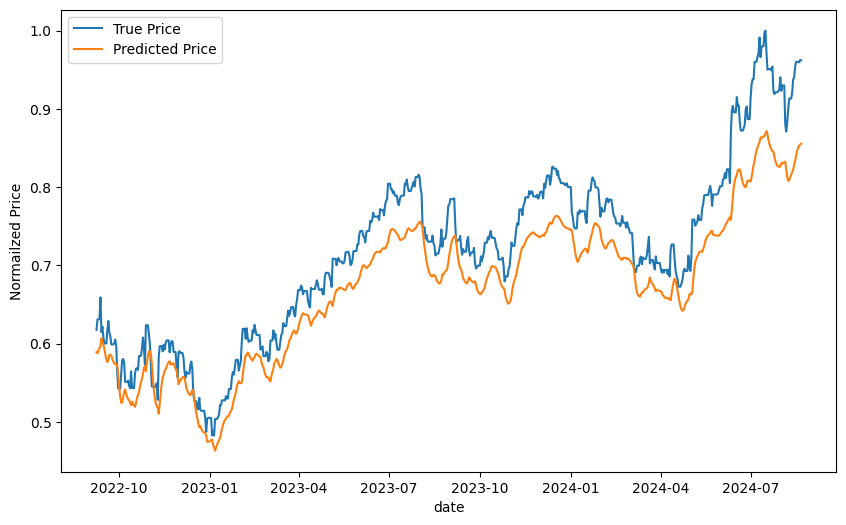

In [8]:
# 모델 평가
loss = model.evaluate(X_test, y_test)
print(f'Model Loss: {loss}')
# 예측
predictions = model.predict(X_test)

print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, predictions)}')
print(f'Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, predictions))}')
print(f'Mean Absolute Error (MAE): {mean_absolute_error(y_test, predictions)}')
print(f'Decision Coefficient (R^2): {r2_score(y_test, predictions)}')

# 결과 시각화
dates_test = dates[-len(y_test):]
plt.figure(figsize=(10, 6))
plt.plot(dates_test, y_test, label='True Price')
plt.plot(dates_test, predictions, label='Predicted Price')
plt.xlabel('date')
plt.ylabel('Normailzed Price')
plt.legend()
plt.show()

In [9]:
# 하이퍼파라미터 그리드 정의
batch_sizes = [8]
epochs_list = [80]
lstm_units = [64]

# 최적의 하이퍼파라미터와 관련된 정보 저장을 위한 초기화
best_score = float('inf')
best_params = {}
best_model = None

def build_tft_model(sequence_length, num_features, lstm_units):
    # Encoder
    encoder_inputs = Input(shape=(sequence_length, num_features))
    lstm_out = LSTM(lstm_units, return_sequences=True)(encoder_inputs)
    lstm_out = LayerNormalization()(lstm_out)

    # Attention
    attention_out, _ = MultiHeadAttention(num_heads=4, key_dim=32)(lstm_out, lstm_out, return_attention_scores=True)
    attention_out = LayerNormalization()(attention_out)

    # Skip connections
    combined = Concatenate()([lstm_out, attention_out])

    # Decoder
    lstm_out = LSTM(lstm_units)(combined)
    lstm_out = LayerNormalization()(lstm_out)
    outputs = Dense(1, activation='linear')(lstm_out)

    model = Model(inputs=encoder_inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='mse')

    return model

In [10]:
# 하이퍼파라미터 탐색
for batch_size in tqdm(batch_sizes, desc='batch_size'):
    for epochs in tqdm(epochs_list, desc='epochs'):
        for units in tqdm(lstm_units, desc='lstm_units'):
            print(f"Testing model with batch_size={batch_size}, epochs={epochs}, lstm_units={units}")

            # 모델 생성
            model = build_tft_model(sequence_length, X_train.shape[2], units)

            # 모델 학습hbn
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)

            # 검증 데이터에 대한 모델 평가
            val_loss = model.evaluate(X_test, y_test, verbose=0)

            # 현재 하이퍼파라미터 조합이 이전보다 나은 경우 업데이트
            if val_loss < best_score:
                best_score = val_loss
                best_params = {'batch_size': batch_size, 'epochs': epochs, 'lstm_units': units}
                best_model = model
                print(f"New best model found with val_loss={val_loss:.4f}")

# 최적의 하이퍼파라미터 출력
print("\nBest hyperparameters:")
print(f"Batch size: {best_params['batch_size']}")
print(f"Epochs: {best_params['epochs']}")
print(f"LSTM units: {best_params['lstm_units']}")
print(f"Best validation loss: {best_score:.4f}")

batch_size:   0%|          | 0/1 [00:00<?, ?it/s]


Testing model with batch_size=8, epochs=80, lstm_units=64



batch_size: 100%|██████████| 1/1 [21:55<00:00, 1315.42s/it]

New best model found with val_loss=0.0008

Best hyperparameters:
Batch size: 8
Epochs: 80
LSTM units: 64
Best validation loss: 0.0008


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━

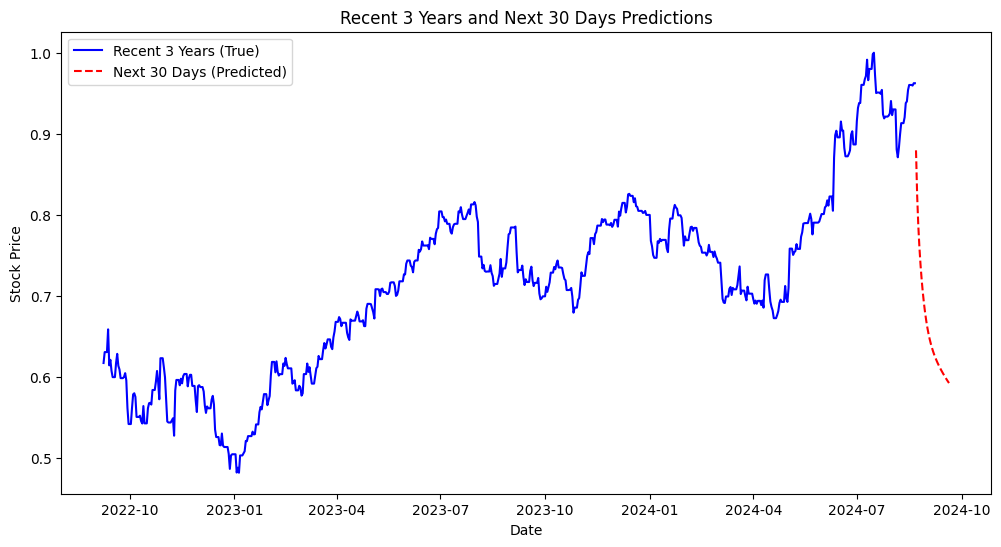

In [11]:
# 과거 3년의 데이터 필터링 (날짜 범위 지정)
recent_3_years_dates = dates[-3*365:]  # 약 3년 (365일 * 3년 기준)
recent_3_years_values = y_test[-3*365:]

# 예측할 미래 시점의 개수 (30일 기준)
future_steps = 30
future_dates = pd.date_range(dates[-1], periods=future_steps + 1, freq='D')[1:]

# 예측 결과를 저장할 리스트
predictions_future = []

# 미래 예측 수행
last_data_point = X_test[-1]  # X_test의 마지막 데이터포인트를 사용하여 예측 시작

for i in range(future_steps):
    next_prediction = best_model.predict(np.expand_dims(last_data_point, axis=0))[0, 0]
    predictions_future.append(next_prediction)
    last_data_point = np.append(last_data_point[1:], [[next_prediction]], axis=0)

# 예측 결과 출력
print(f"Future {future_steps} steps predictions: {predictions_future}")

# 예측 결과에 해당하는 날짜와 값을 시리즈로 변환
predictions_future_series = pd.Series(predictions_future, index=future_dates)

# 데이터의 길이를 맞추기 위해 recent_3_years_dates를 조정
recent_3_years_dates = recent_3_years_dates[-len(recent_3_years_values):]

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(recent_3_years_dates, recent_3_years_values, label='Recent 3 Years (True)', color='blue')
plt.plot(future_dates, predictions_future_series, label=f'Next {future_steps} Days (Predicted)', color='red', linestyle='--')
plt.title('Recent 3 Years and Next 30 Days Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.xticks()
plt.legend()
plt.show()

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


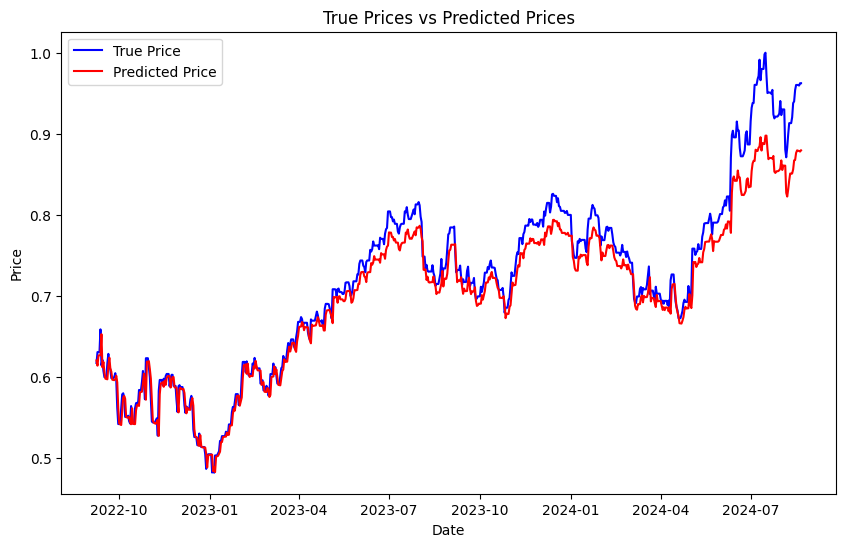

In [12]:
# 예측 수행 (예: 모델이 714개의 테스트 데이터를 예측하는 경우)
predictions = model.predict(X_test)

# y_test와 predictions의 길이 확인
length_y_test = len(y_test)
length_predictions = len(predictions)

# 성능 평가
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

html_content = f'''
<div style="border: 2px solid #4CAF50; border-radius: 10px; padding: 20px; background-color: #f9f9f9;">
    <h2 style="color: #4CAF50;">Model Evaluation Results</h2>
    <p><strong>Length of y_test:</strong> {length_y_test}</p>
    <p><strong>Length of predictions:</strong> {length_predictions}</p>
    <h3 style="color: #4CAF50;">Performance Metrics</h3>
    <ul>
        <li><strong>Mean Squared Error (MSE):</strong> {mse:.4f}</li>
        <li><strong>Root Mean Squared Error (RMSE):</strong> {rmse:.4f}</li>
        <li><strong>Mean Absolute Error (MAE):</strong> {mae:.4f}</li>
        <li><strong>Decision Coefficient (R<sup>2</sup>):</strong> {r2:.4f}</li>
    </ul>
</div>
'''

display(HTML_display(html_content))

# 결과 시각화
# dates 배열을 y_test 길이로 조정
adjusted_dates = dates[-len(y_test):]

plt.figure(figsize=(10, 6))
plt.plot(adjusted_dates, y_test, label='True Price', color='blue')
plt.plot(adjusted_dates, predictions, label='Predicted Price', color='red')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks()
plt.title('True Prices vs Predicted Prices')
plt.show()

In [13]:
def evaluate_model_performance(y_train, y_train_pred, y_test, y_test_pred):
    # Training set 평가
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_train_pred)

    # Validation set 평가
    val_mse = mean_squared_error(y_test, y_test_pred)
    val_rmse = np.sqrt(val_mse)
    val_r2 = r2_score(y_test, y_test_pred)

    # 과적합/과소적합 판단
    if train_mse < val_mse and abs(train_mse - val_mse) > 0.01:
        model_status = "모델이 과적합된 것 같습니다."
        status_color = "red"
    elif train_mse > val_mse:
        model_status = "모델이 과소적합된 것 같습니다."
        status_color = "orange"
    else:
        model_status = "모델이 잘 일반화된 것 같습니다."
        status_color = "green"

    html_content = f'''
    <div style="border: 2px solid #4CAF50; border-radius: 10px; padding: 20px; background-color: #f9f9f9;">
        <h2 style="color: #4CAF50;">Model Performance Evaluation</h2>

        <h3 style="color: #4CAF50;">Training Set</h3>
        <ul>
            <li><strong>Mean Squared Error (MSE):</strong> {train_mse:.4f}</li>
            <li><strong>Root Mean Squared Error (RMSE):</strong> {train_rmse:.4f}</li>
            <li><strong>Decision Coefficient (R<sup>2</sup>):</strong> {train_r2:.4f}</li>
        </ul>

        <h3 style="color: #4CAF50;">Validation Set</h3>
        <ul>
            <li><strong>Mean Squared Error (MSE):</strong> {val_mse:.4f}</li>
            <li><strong>Root Mean Squared Error (RMSE):</strong> {val_rmse:.4f}</li>
            <li><strong>Decision Coefficient (R<sup>2</sup>):</strong> {val_r2:.4f}</li>
        </ul>

        <h3 style="color: {status_color};">Model Status</h3>
        <p>{model_status}</p>
    </div>
    '''

    display(HTML_display(html_content))

# 모델을 통한 예측
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 모델 성능 평가
evaluate_model_performance(y_train, y_train_pred, y_test, y_test_pred)


90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [14]:
# 저장된 모델 로드
#loaded_model = load_model('../svae_models/regression_samsung_tft.h5')

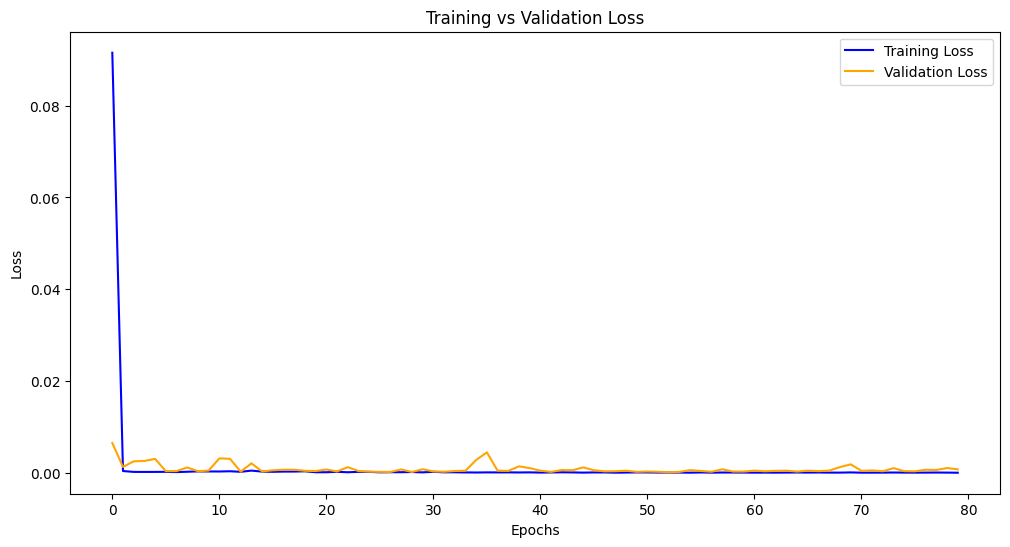

In [15]:
# X축 데이터 날짜 변환
def configure_date_format(ax, date_range):
    date_format = mdates.DateFormatter('%Y-%m')
    ax.xaxis.set_major_formatter(date_format)
    ax.set_xlim(date_range[0], date_range[-1])
    plt.xticks(rotation=45)

# 1. 학습 손실 및 검증 손실 그래프
def plot_training_history(history):

    # HTML 설명
    html_content = '''
    <div style="border: 2px solid #4CAF50; padding: 15px; border-radius: 10px; background-color: #f9f9f9;">
        <h2 style="color:#4CAF50; font-family: Arial, sans-serif;">🔍 학습 손실 vs 검증 손실 그래프 분석</h2>
        <p style="font-size: 14px; font-family: Arial, sans-serif;">
            이 그래프는 모델의 학습 손실 <span style="color:blue;"><strong>(파란색)</strong></span>과 검증 손실 <span style="color:orange;"><strong>(주황색)</strong></span>을 비교하여, 모델의 성능을 평가하는 데 사용됩니다.
        </p>
        <ul style="font-size: 14px; font-family: Arial, sans-serif;">
            <li><strong>초기 손실:</strong> 학습 초기 단계에서 손실이 급격히 감소하여 모델이 빠르게 패턴을 학습하고 있음을 보여줍니다.</li>
            <li><strong>손실 안정화:</strong> 에포크가 진행됨에 따라 손실 값이 안정화되며, 이는 모델이 수렴되었음을 나타냅니다.</li>
            <li><strong>과적합 여부:</strong> 학습 손실과 검증 손실의 차이가 거의 없으므로, 모델이 과적합되지 않고 잘 일반화되고 있음을 확인할 수 있습니다.</li>
        </ul>
    </div>
    '''
    # HTML 렌더링
    display(HTML_display(html_content))

    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# 학습 손실 및 검증 손실 그래프 호출
plot_training_history(history)

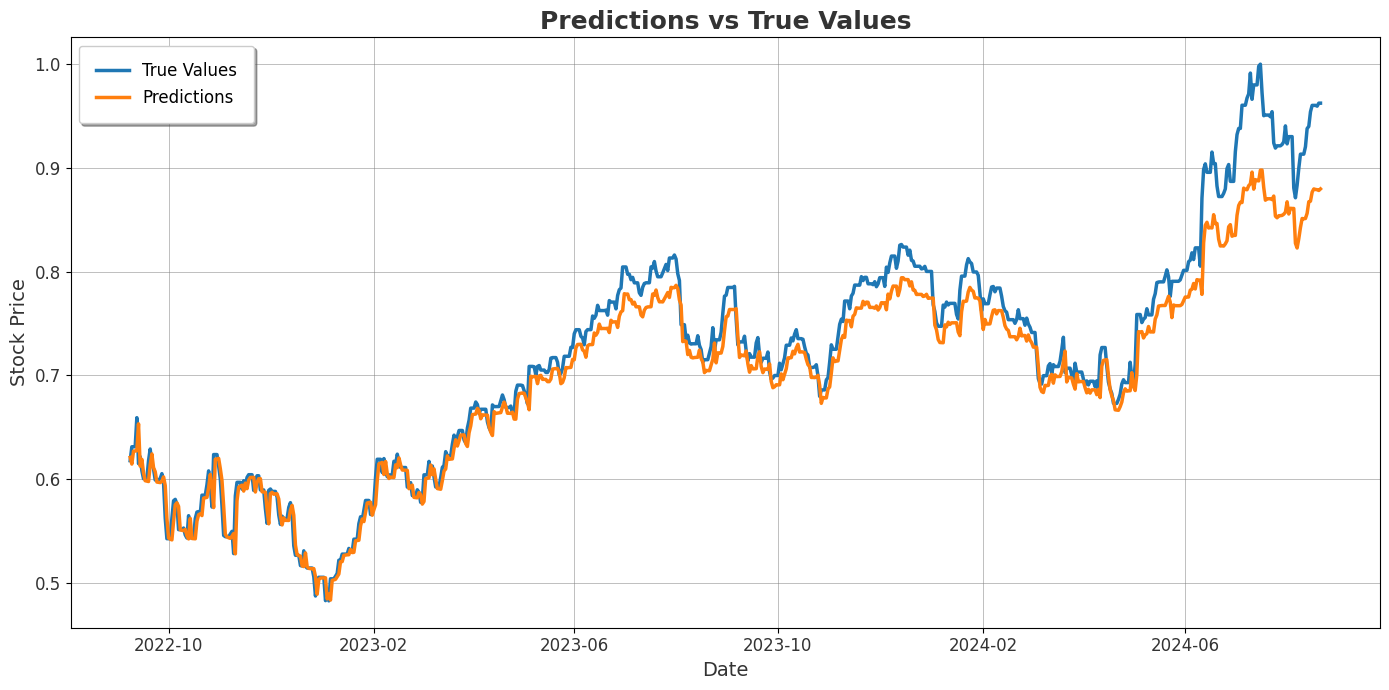

In [16]:
# 그래프 생성 및 HTML 설명을 포함한 함수
def plot_predictions(y_test, y_pred, HTML=None):
    # HTML 설명 블록 설정
    if HTML is None:
        HTML = '''
        <div style="border: 2px solid #4CAF50; padding: 20px; border-radius: 10px; background-color: #f0f8ff;">
            <h2 style="color:#333333; font-family: 'Arial', sans-serif; text-align:center;">
                📊 예측 값 vs 실제 값 그래프
            </h2>
            <p style="font-size: 15px; font-family: 'Arial', sans-serif; color: #555555; line-height: 1.6;">
                아래 그래프는 <strong>모델의 예측 값</strong>과 <strong>실제 값</strong>을 비교하여
                모델의 예측 성능을 평가합니다. 두 그래프가 잘 맞아떨어질수록
                모델의 예측이 정확하다는 것을 의미합니다.
            </p>
            <ul style="font-size: 15px; font-family: 'Arial', sans-serif; color: #555555; line-height: 1.6;">
                <li><strong style="color: blue;">True Values (파란색):</strong> 실제 주가 데이터를 나타냅니다.</li>
                <li><strong style="color: orange;">Predictions (주황색):</strong> 모델이 예측한 주가 데이터를 나타냅니다.</li>
            </ul>
        </div>
        '''
    # HTML 렌더링
    display(HTML_display(HTML))

    # 그래프 생성
    plt.figure(figsize=(14, 7))
    plt.plot(y_test.index, y_test, label='True Values', color='#1f77b4', linewidth=2.5)
    plt.plot(y_pred.index, y_pred, label='Predictions', color='#ff7f0e', linewidth=2.5)
    plt.title('Predictions vs True Values', fontsize=18, fontweight='bold', color='#333333')
    plt.xlabel('Date', fontsize=14, color='#333333')
    plt.ylabel('Stock Price', fontsize=14, color='#333333')
    plt.legend(fontsize=12, loc='upper left', frameon=True, shadow=True, borderpad=1)

    # 날짜 포맷 설정 및 레이블 회전 제거
    ax = plt.gca()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))  # 4개월 간격으로 레이블 표시
    plt.xticks(rotation=0, fontsize=12, color='#333333')  # 회전 없이 날짜 표시
    plt.yticks(fontsize=12, color='#333333')

    # 그래프 스타일 추가
    plt.grid(True, which='both', linewidth=0.5, color='gray', alpha=0.7)
    plt.tight_layout()

    # 그래프 표시
    plt.show()

# 예시 데이터: dates 배열을 y_test의 길이로 조정
adjusted_dates = dates[-len(y_test):]

# 예측 값 vs 실제 값 그래프 호출
plot_predictions(pd.Series(y_test, index=adjusted_dates), pd.Series(y_test_pred.flatten(), index=adjusted_dates))

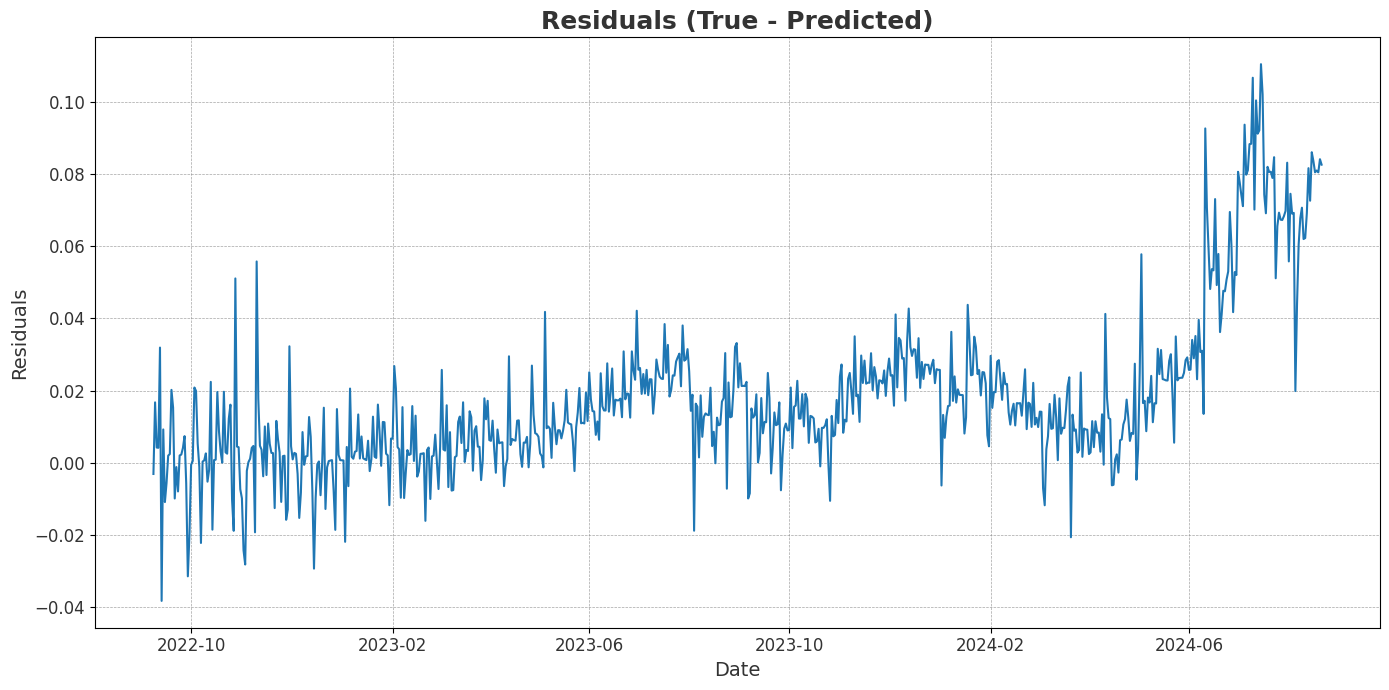

In [17]:
# 3. 잔차 그래프
def plot_residuals(y_test, y_pred, HTML=None):
    # 잔차 계산 (실제 값 - 예측 값)
    residuals = y_test - y_pred

    # HTML 설명 블록 설정
    if HTML is None:
        HTML = '''
        <div style="border: 2px solid #4CAF50; padding: 20px; border-radius: 10px; background-color: #f0f8ff;">
            <h2 style="color:#333333; font-family: 'Arial', sans-serif; text-align:center;">
                📉 잔차 그래프 분석
            </h2>
            <p style="font-size: 15px; font-family: 'Arial', sans-serif; color: #555555; line-height: 1.6;">
                이 그래프는 <strong>모델의 예측 값</strong>과 <strong>실제 값</strong> 간의 차이인 잔차(residual)를 보여줍니다.
                <br>잔차가 0을 중심으로 무작위하게 분포하면, 모델이 데이터를 잘 예측했음을 나타냅니다.
                <br>잔차가 패턴을 형성하거나 일정한 방향으로 치우쳐 있다면, 이는 모델의 예측에서 체계적인 오류가 존재할 가능성을 시사합니다.
            </p>
        </div>
        '''
    # HTML 렌더링
    display(HTML_display(HTML))

    # 잔차 그래프 생성
    plt.figure(figsize=(14, 7))
    plt.plot(residuals.index, residuals, color='#1f77b4', linewidth=1.5)
    plt.title('Residuals (True - Predicted)', fontsize=18, fontweight='bold', color='#333333')
    plt.xlabel('Date', fontsize=14, color='#333333')
    plt.ylabel('Residuals', fontsize=14, color='#333333')

    # 날짜 포맷 설정
    ax = plt.gca()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
    plt.xticks(rotation=0, fontsize=12, color='#333333')
    plt.yticks(fontsize=12, color='#333333')

    # 그리드 추가
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
    plt.tight_layout()

    # 그래프 표시
    plt.show()

# 잔차 그래프 호출
plot_residuals(pd.Series(y_test, index=adjusted_dates), pd.Series(y_test_pred.flatten(), index=adjusted_dates))

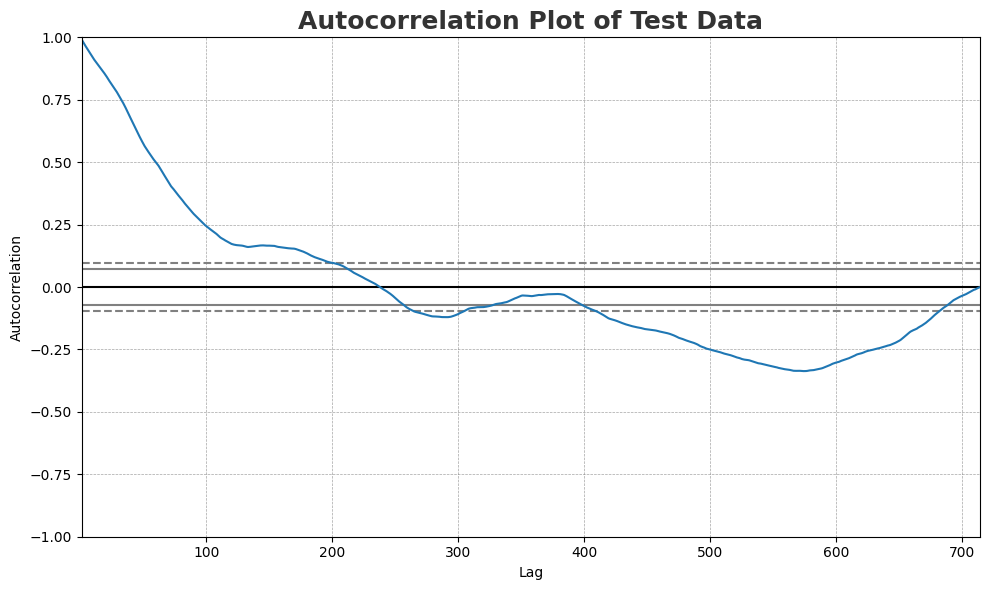

In [18]:
# 4. 자기상관도 그래프
def plot_autocorrelation(y_test, adjusted_dates=None, html_text=None):

    # HTML 설명 블록 설정
    if html_text is None:
        html_text = '''
        <div style="border: 2px solid #4CAF50; padding: 20px; border-radius: 10px; background-color: #f9f9f9;">
            <h2 style="color:#333333; font-family: 'Arial', sans-serif; text-align:center;">
                🔄 자기상관도 그래프 분석
            </h2>
            <p style="font-size: 15px; font-family: 'Arial', sans-serif; color: #555555; line-height: 1.6;">
                이 그래프는 <strong>시계열 데이터</strong>에서 특정 시차(Lag)를 두고 데이터 간의 <strong>유사성</strong>을 시각적으로 보여줍니다.
                <br><br>
                <strong style="color: #4CAF50;">💡 높은 자기상관:</strong> 그래프에서 초기의 자기상관 값이 높게 나타나면, 데이터가 일정 기간 동안 유사한 패턴을 유지하고 있음을 의미합니다.
                <br>
                <strong style="color: #4CAF50;">🔄 주기적 패턴:</strong> 만약 자기상관이 주기적으로 반복된다면, 데이터에 주기적 패턴이 존재할 가능성을 시사합니다. 이는 모델이 이러한 패턴을 학습하여 예측 성능을 향상시키는 데 도움이 될 수 있습니다.
                <br>
                <strong style="color: #FF5733;">❗ 낮은 자기상관:</strong> 반대로, 자기상관 값이 급격히 감소하거나 일정한 패턴 없이 변동한다면, 이는 데이터가 무작위적이거나 주기적이지 않다는 것을 나타낼 수 있습니다.
                <br><br>
                <strong>X축:</strong> 시차(Lag)로, 시계열 데이터에서 과거 데이터와 현재 데이터 사이의 시간 간격을 나타냅니다.
                <br>
                <strong>Y축:</strong> 자기상관 값으로, 특정 시차에서 데이터의 유사성을 나타내는 값입니다. 1에 가까울수록 강한 양의 상관관계, -1에 가까울수록 강한 음의 상관관계를 의미합니다.
            </p>
        </div>
        '''
    display(HTML_display(html_text))

    plt.figure(figsize=(10, 6))

    # y_test가 시계열인지 확인하고 설정
    if adjusted_dates is not None:
        y_test = pd.Series(y_test, index=adjusted_dates)

    autocorrelation_plot(y_test)
    plt.title('Autocorrelation Plot of Test Data', fontsize=18, fontweight='bold', color='#333333')

    # 그래프 스타일 추가
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
    plt.tight_layout()

    # 그래프 표시
    plt.show()

# 자기상관도 그래프 호출
plot_autocorrelation(y_test, adjusted_dates=adjusted_dates)

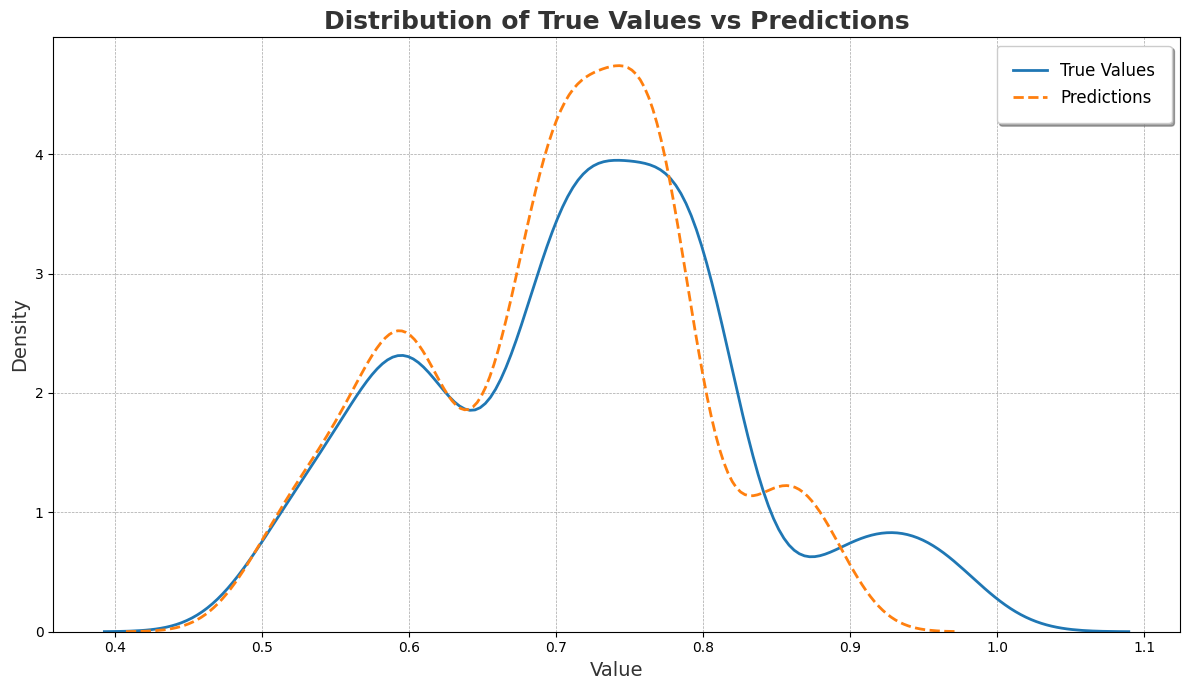

In [19]:
# 5. 커널 밀도 추정 그래프
def plot_distribution_comparison(y_test, y_pred, html_text=None):
    # HTML 설명 블록 설정
    if html_text is None:
        html_text = '''
        <div style="border: 2px solid #4CAF50; padding: 20px; border-radius: 10px; background-color: #f9f9f9;">
            <h2 style="color:#333333; font-family: 'Arial', sans-serif; text-align:center;">
                📈 커널 밀도 추정 그래프 분석
            </h2>
            <p style="font-size: 15px; font-family: 'Arial', sans-serif; color: #555555; line-height: 1.6;">
                이 그래프는 <strong>실제 값</strong>과 <strong>모델 예측 값</strong>의 분포를 비교하여
                모델이 데이터의 분포를 얼마나 잘 학습했는지 평가합니다.
                <br><br>
                <strong style="color: #4CAF50;">✅ 모델 예측이 잘 맞을 때:</strong> 두 곡선이 서로 잘 겹칩니다. 이는 모델이 실제 데이터의 분포를 잘 학습했음을 의미합니다.
                <br>
                <strong style="color: #FF5733;">❗ 모델 예측이 부정확할 때:</strong> 곡선이 서로 겹치지 않거나 큰 차이가 날 경우, 모델이 데이터의 분포를 제대로 학습하지 못했음을 나타냅니다.
                <br><br>
                <strong>X축:</strong> 변수의 값(Value)을 나타냅니다.
                <br>
                <strong>Y축:</strong> 해당 값이 나타날 확률 밀도(Density)를 나타냅니다.
            </p>
        </div>
        '''
    display(HTML_display(html_text))

    plt.figure(figsize=(12, 7))

    # KDE 플롯: 시계열 데이터가 아닌 순수한 값으로 플롯을 생성
    sns.kdeplot(y_test, label='True Values', color='#1f77b4', linewidth=2)
    sns.kdeplot(y_pred, label='Predictions', color='#ff7f0e', linestyle='--', linewidth=2)

    plt.title('Distribution of True Values vs Predictions', fontsize=18, fontweight='bold', color='#333333')
    plt.legend(fontsize=12, loc='upper right', frameon=True, shadow=True, borderpad=1)
    plt.xlabel('Value', fontsize=14, color='#333333')
    plt.ylabel('Density', fontsize=14, color='#333333')

    # 그래프 스타일 추가
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
    plt.tight_layout()

    # 그래프 표시
    plt.show()

# 커널 밀도 추정 그래프 호출
plot_distribution_comparison(y_test, y_test_pred.flatten())

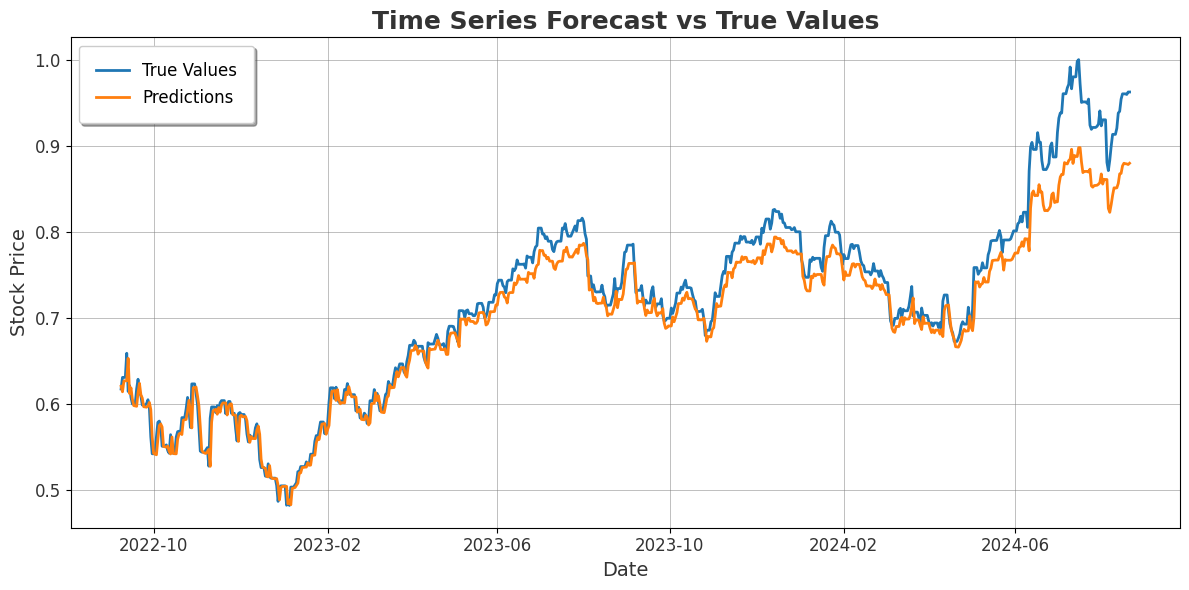

In [20]:
# 6. 시계열 예측 그래프 (Time Series Forecasting Plot)
def plot_time_series_forecast(y_test, y_pred, HTML=None):

    # HTML 설명 블록 설정
    if HTML is None:
        HTML = '''
        <div style="border: 2px solid #4CAF50; padding: 20px; border-radius: 10px; background-color: #f9f9f9;">
            <h2 style="color:#333333; font-family: 'Arial', sans-serif; text-align:center;">
                ⏳ 시계열 예측 그래프 분석
            </h2>
            <p style="font-size: 15px; font-family: 'Arial', sans-serif; color: #555555; line-height: 1.6;">
                이 그래프는 <strong>시간 축</strong>을 따라 <strong>모델의 예측 값</strong>과 <strong>실제 값</strong>을 비교하여
                시계열 데이터에 대한 모델의 성능을 평가하는 데 사용됩니다.
                <br><br>
                <strong style="color: #4CAF50;">✅ 모델 예측이 정확할 때:</strong> 예측 값과 실제 값이 잘 일치하여, 두 그래프가 서로 겹칩니다.
                <br>
                <strong style="color: #FF5733;">❗ 모델 예측이 부정확할 때:</strong> 예측 값과 실제 값 사이에 큰 차이가 있으며, 이는 모델이 시계열 데이터의 변동성을 잘 학습하지 못했음을 나타냅니다.
                <br><br>
                <strong>X축:</strong> 시간 축(Date)으로, 시계열 데이터의 특정 시점을 나타냅니다.
                <br>
                <strong>Y축:</strong> 주가(Stock Price)로, 해당 시점에서의 주가 값을 나타냅니다.
            </p>
        </div>
        '''
    display(HTML_display(HTML))

    plt.figure(figsize=(12, 6))

    # 시계열 그래프 생성
    plt.plot(y_test.index, y_test, label='True Values', color='#1f77b4', linewidth=2)
    plt.plot(y_pred.index, y_pred, label='Predictions', color='#ff7f0e', linewidth=2)

    plt.title('Time Series Forecast vs True Values', fontsize=18, fontweight='bold', color='#333333')
    plt.xlabel('Date', fontsize=14, color='#333333')
    plt.ylabel('Stock Price', fontsize=14, color='#333333')

    # 날짜 포맷 설정
    ax = plt.gca()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
    plt.xticks(rotation=0, fontsize=12, color='#333333')
    plt.yticks(fontsize=12, color='#333333')

    # 그래프 스타일 추가
    plt.grid(True, which='both', linewidth=0.5, color='gray', alpha=0.7)
    plt.legend(fontsize=12, loc='upper left', frameon=True, shadow=True, borderpad=1)
    plt.tight_layout()

    # 그래프 표시
    plt.show()

# 시계열 예측 그래프 호출
plot_time_series_forecast(pd.Series(y_test, index=adjusted_dates), pd.Series(y_test_pred.flatten(), index=adjusted_dates))

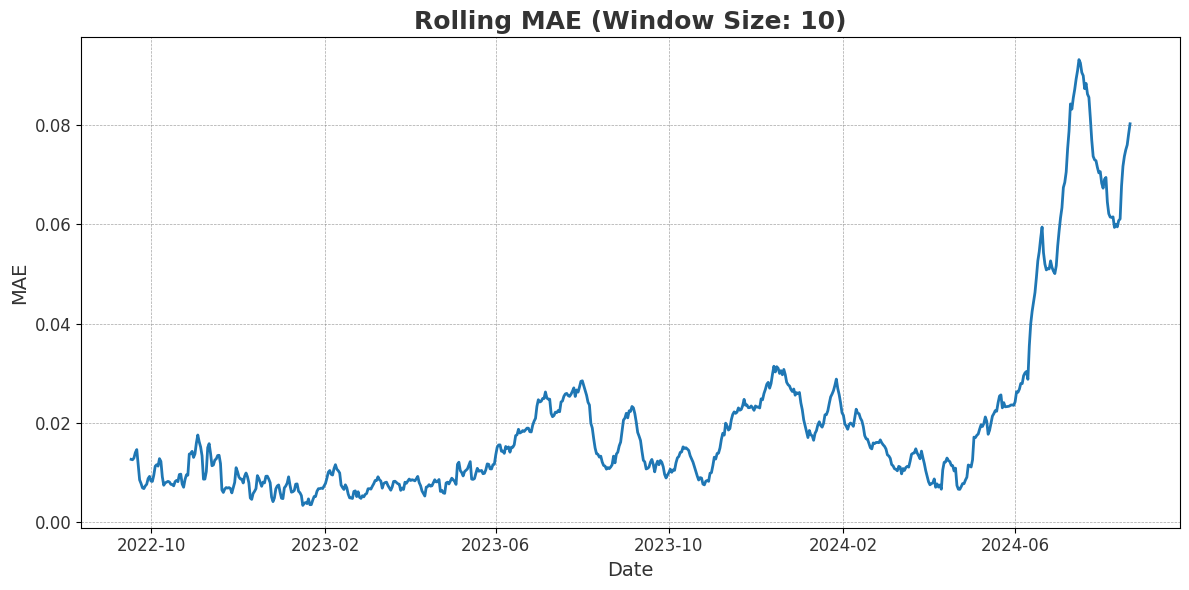

In [21]:
# 7. 평균 절대 오차 (MAE) vs. 시점 그래프
def plot_mae_over_time(y_test, y_pred, window=10, HTML=None):

    # HTML 설명 블록 설정
    if HTML is None:
        HTML = '''
        <div style="border: 2px solid #4CAF50; padding: 20px; border-radius: 10px; background-color: #f9f9f9;">
            <h2 style="color:#333333; font-family: 'Arial', sans-serif; text-align:center;">
                📉 평균 절대 오차 (MAE) vs. 시점 그래프 분석
            </h2>
            <p style="font-size: 15px; font-family: 'Arial', sans-serif; color: #555555; line-height: 1.6;">
                이 그래프는 <strong>시간에 따른 모델의 예측 성능</strong>을 평가하기 위해,
                <strong>평균 절대 오차(MAE)</strong>를 시각적으로 보여줍니다.
                <br><br>
                <strong style="color: #4CAF50;">✅ 낮은 MAE:</strong> 그래프가 낮고 안정적인 값을 유지할 때, 모델의 예측이 일관되고 정확함을 의미합니다.
                <br>
                <strong style="color: #FF5733;">❗ 높은 MAE:</strong> 그래프에서 MAE가 높아질 때, 이는 모델의 예측 성능이 떨어지거나 변동성이 클 수 있음을 시사합니다.
                <br><br>
                <strong>X축:</strong> 시간 축(Date)으로, 시계열 데이터의 특정 시점을 나타냅니다.
                <br>
                <strong>Y축:</strong> 평균 절대 오차(MAE)로, 예측 값과 실제 값 사이의 차이의 절대값을 평균한 값입니다.
            </p>
        </div>
        '''
    display(HTML_display(HTML))

    # MAE 계산
    mae = np.abs(y_test - y_pred)
    rolling_mae = mae.rolling(window=window).mean()

    # 그래프 생성
    plt.figure(figsize=(12, 6))
    plt.plot(rolling_mae.index, rolling_mae, color='#1f77b4', linewidth=2)
    plt.title(f'Rolling MAE (Window Size: {window})', fontsize=18, fontweight='bold', color='#333333')
    plt.xlabel('Date', fontsize=14, color='#333333')
    plt.ylabel('MAE', fontsize=14, color='#333333')

    # 날짜 포맷 설정
    ax = plt.gca()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
    plt.xticks(rotation=0, fontsize=12, color='#333333')
    plt.yticks(fontsize=12, color='#333333')

    # 그래프 스타일 추가
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
    plt.tight_layout()

    # 그래프 표시
    plt.show()

# 평균 절대 오차(MAE) vs 시점 그래프 호출
plot_mae_over_time(pd.Series(y_test, index=adjusted_dates), pd.Series(y_test_pred.flatten(), index=adjusted_dates))

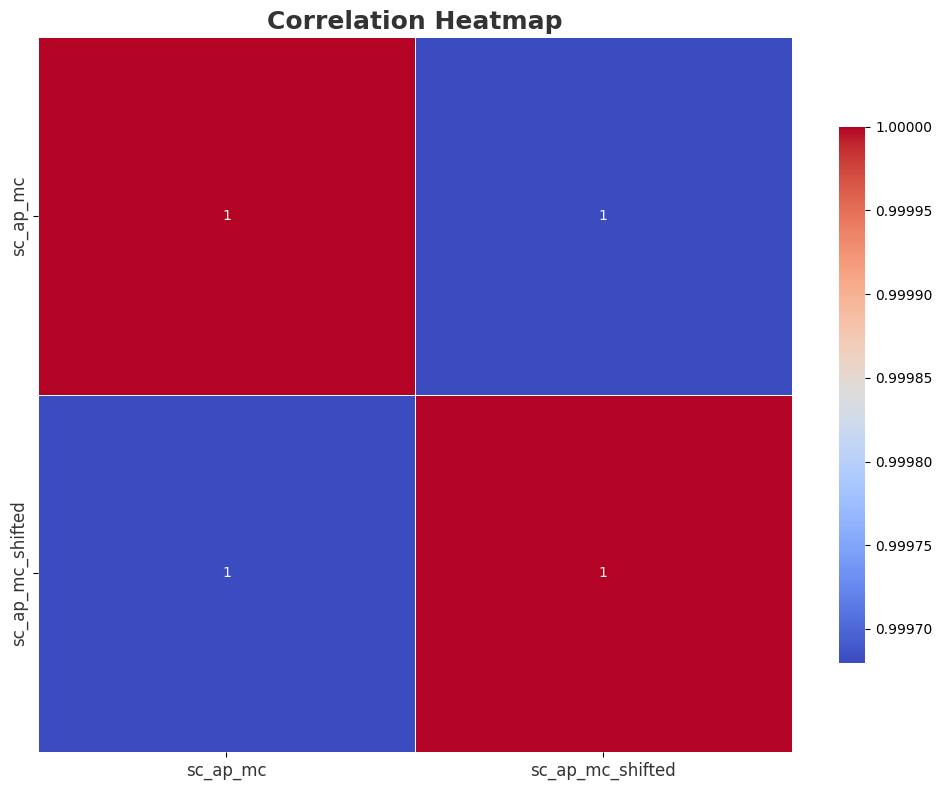

In [22]:
# 8. 피어슨 상관계수 히트맵 (Correlation Heatmap)
stock_df[f'{find_word}_shifted'] = stock_df[find_word].shift(1).fillna(0)

# 피어슨 상관계수 히트맵 함수 정의
def plot_correlation_heatmap(dataframe, html_text=None):
    # HTML 설명 블록 설정
    if html_text is None:
        html_text = '''
        <div style="border: 2px solid #4CAF50; padding: 20px; border-radius: 10px; background-color: #f9f9f9;">
            <h2 style="color:#333333; font-family: 'Arial', sans-serif; text-align:center;">
                🔍 피어슨 상관계수 히트맵 분석
            </h2>
            <p style="font-size: 15px; font-family: 'Arial', sans-serif; color: #555555; line-height: 1.6;">
                이 히트맵은 데이터 프레임에 포함된 여러 변수들 간의 <strong>상관관계</strong>를 시각적으로 보여줍니다.
                <br><br>
                <strong style="color: #4CAF50;">✅ 높은 상관관계:</strong> 두 변수 간의 상관계수 값이 1 또는 -1에 가까울수록, 그 변수들이 서로 강하게 양(또는 음)의 상관관계를 가짐을 나타냅니다.
                <br>
                <strong style="color: #FF5733;">❗ 낮은 상관관계:</strong> 상관계수 값이 0에 가까울수록, 두 변수 간의 관계가 약하거나 무작위적일 가능성이 높습니다.
                <br><br>
                <strong>히트맵 이해:</strong>
                <ul style="font-size: 14px; line-height: 1.6;">
                    <li><strong>X축과 Y축:</strong> 비교하는 두 변수의 이름을 나타냅니다.</li>
                    <li><strong>색상:</strong> 상관계수 값의 크기에 따라 색상이 변합니다. 빨간색에 가까울수록 양의 상관관계가 크고, 파란색에 가까울수록 음의 상관관계가 큽니다.</li>
                    <li><strong>숫자:</strong> 각 셀에 표시된 숫자는 변수 간의 상관계수 값을 나타냅니다.</li>
                </ul>
            </p>
        </div>
        '''
    display(HTML_display(html_text))

    plt.figure(figsize=(10, 8))

    # 상관계수 행렬 계산
    correlation_matrix = dataframe.corr()

    # 히트맵 생성
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, cbar_kws={"shrink": 0.75})
    plt.title('Correlation Heatmap', fontsize=18, fontweight='bold', color='#333333')

    # 그래프 스타일 추가
    plt.xticks(rotation=0, fontsize=12, color='#333333')
    plt.yticks(rotation=90, fontsize=12, color='#333333')
    plt.tight_layout()

    # 그래프 표시
    plt.show()

# 수치형 열만 선택하여 피어슨 상관계수 히트맵 호출
plot_correlation_heatmap(stock_df[[find_word, f'{find_word}_shifted']])

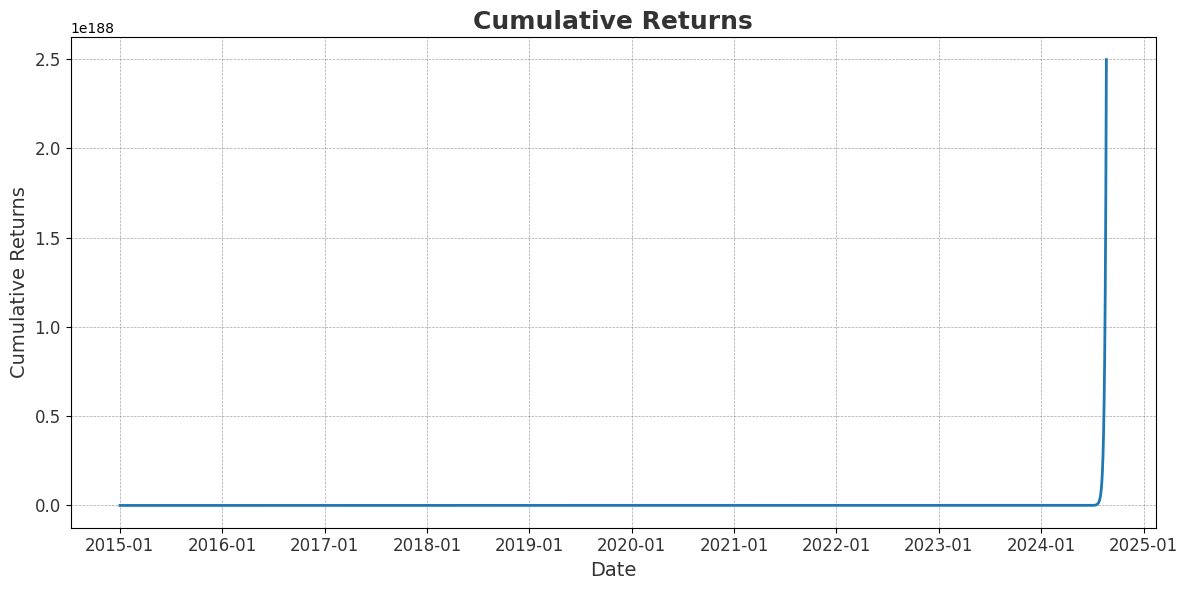

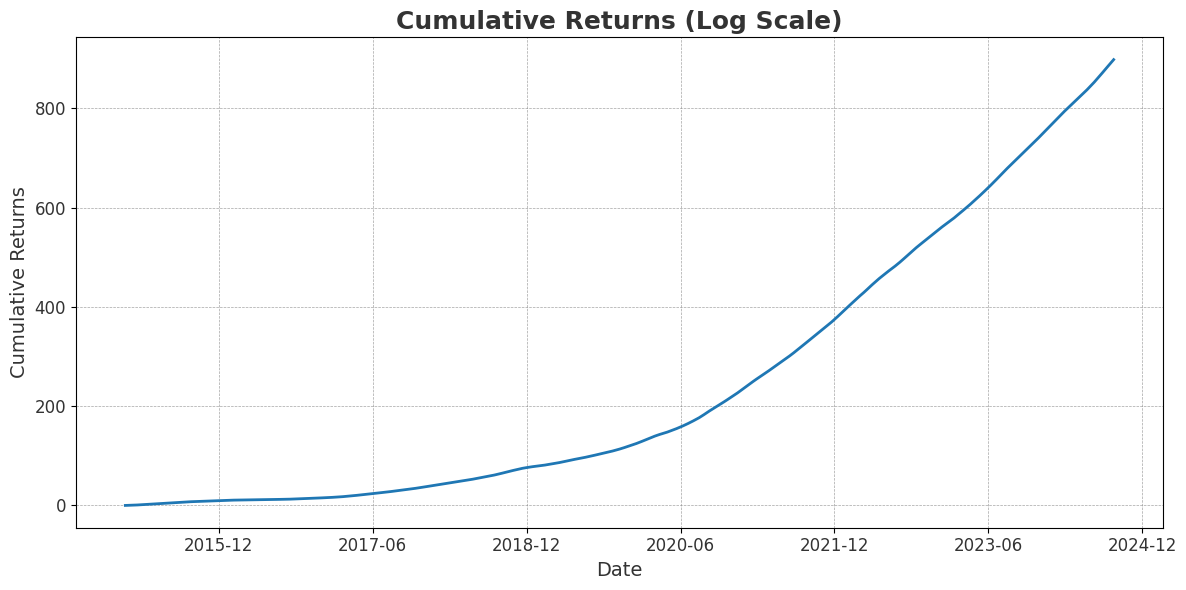

In [23]:
# 9. 특정 기간의 누적 수익률만 계산해보기
def analyze_cumulative_returns(returns, dates, start_date='2015-01-01', clip_range=(-0.2, 0.2)):
    start_date = pd.to_datetime(start_date)  # 문자열을 datetime 객체로 변환
    selected_period_returns = returns[dates > start_date]
    selected_dates = dates[dates > start_date]

    def plot_cumulative_returns(cumulative_returns, dates):
        plt.figure(figsize=(12, 6))
        cumulative_returns = (1 + cumulative_returns).cumprod() - 1

        if not pd.api.types.is_datetime64_any_dtype(dates):
            dates = pd.to_datetime(dates)

        plt.plot(dates, cumulative_returns, color='#1f77b4', linewidth=2)

        plt.title('Cumulative Returns', fontsize=18, fontweight='bold', color='#333333')
        plt.xlabel('Date', fontsize=14, color='#333333')
        plt.ylabel('Cumulative Returns', fontsize=14, color='#333333')

        ax = plt.gca()
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        ax.xaxis.set_major_locator(mdates.YearLocator())
        plt.xticks(fontsize=12, color='#333333')
        plt.yticks(fontsize=12, color='#333333')

        plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
        plt.tight_layout()
        plt.show()

    def plot_cumulative_returns_log(cumulative_returns, dates):
        plt.figure(figsize=(12, 6))
        cumulative_returns = np.log1p(cumulative_returns).cumsum()

        plt.plot(dates, cumulative_returns, color='#1f77b4', linewidth=2)

        plt.title('Cumulative Returns (Log Scale)', fontsize=18, fontweight='bold', color='#333333')
        plt.xlabel('Date', fontsize=14, color='#333333')
        plt.ylabel('Cumulative Returns', fontsize=14, color='#333333')

        ax = plt.gca()
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=18))
        plt.xticks(fontsize=12, color='#333333')
        plt.yticks(fontsize=12, color='#333333')

        plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
        plt.tight_layout()
        plt.show()

    html_text = f"""
    <div style="font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; 
                background-color: #f9f9f9; color: #333; padding: 5px 20px; 
                border-radius: 12px; box-shadow: 0 4px 12px rgba(0, 0, 0, 0.1); 
                max-width: 800px; margin: auto; line-height: 1.6;">
                
        <h1 style="color: #27ae60; text-align: center; border-bottom: 4px solid #27ae60; 
                   padding-bottom: 10px; margin-bottom: 10px;">📊 누적 수익률 분석</h1>
                   
        <p style="font-size: 16px; text-align: justify; margin-bottom: 5px;">
            본 분석에서는 <strong>{start_date.date()}</strong> 이후의 기간 동안의 누적 수익률을 평가합니다. 
            누적 수익률은 투자 가치의 변화를 시간에 따라 계산한 값으로, 각 기간의 수익률을 
            누적하여 최종 성과를 평가하는 데 유용합니다. 이 분석은 투자의 전반적인 성장 추세를 
            파악하고, 전략의 성과를 검토하는 데 도움이 됩니다.
        </p>

        <h2 style="color: #2980b9; margin-top: 5px; margin-bottom: 5px;">1. 누적 수익률</h2>
        <p style="font-size: 16px; text-align: justify; margin-bottom: 5px;">
            첫 번째 그래프는 시간에 따른 누적 수익률을 나타냅니다. Y축은 누적 수익률을 나타내며, 
            X축은 날짜를 나타냅니다. 이 시각화는 투자 성과의 전반적인 추세를 이해하는 데 
            도움이 됩니다. 양의 기울기는 투자 가치의 증가를, 음의 기울기는 감소를 의미합니다. 
            투자 기간 동안의 성장과 하락 패턴을 시각적으로 파악할 수 있습니다.
        </p>

        <h2 style="color: #c0392b; margin-top: 5px; margin-bottom: 5px;">2. 로그 스케일의 누적 수익률</h2>
        <p style="font-size: 16px; text-align: justify; margin-bottom: 5px;">
            두 번째 그래프는 누적 수익률을 로그 스케일로 나타냅니다. 로그 변환은 데이터의 
            기하급수적 성장 또는 감소 패턴을 식별하는 데 유용합니다. 로그 스케일을 사용하면 
            작은 변화를 더 명확히 관찰할 수 있으며, 장기적인 성과의 세부적인 변화와 작은 
            수익률 변화를 이해하는 데 도움이 됩니다.
        </p>

        <h2 style="color: #2c3e50; margin-top: 5px; margin-bottom: 5px;">🔍 결과 해석</h2>
        <p style="font-size: 16px; text-align: justify; margin-bottom: 5px;">
            누적 수익률 그래프는 투자가 시간에 따라 어떻게 성장하고 감소했는지를 명확히 
            보여줍니다. 로그 스케일 그래프는 수익률의 변화 속도를 강조하며, 이익이나 손실이 
            가속화된 기간을 식별하는 데 유용합니다. 분석에서 극단적인 이상치는 {clip_range[0]*100}%에서 
            {clip_range[1]*100}%로 클리핑되어 분석의 신뢰성을 높였습니다. 이를 통해 투자 성과를 보다 
            정확히 평가하고, 향후 투자 전략을 조정하는 데 유용한 인사이트를 제공할 수 있습니다.
        </p>
    </div>
    """

    display(HTML_display(html_text))

    selected_period_returns_clipped = np.clip(selected_period_returns, *clip_range)
    plot_cumulative_returns(selected_period_returns_clipped, selected_dates)
    plot_cumulative_returns_log(selected_period_returns, selected_dates)

# 함수 호출 예시
analyze_cumulative_returns(stock_df[find_word].values, stock_df['sc_date'].values)

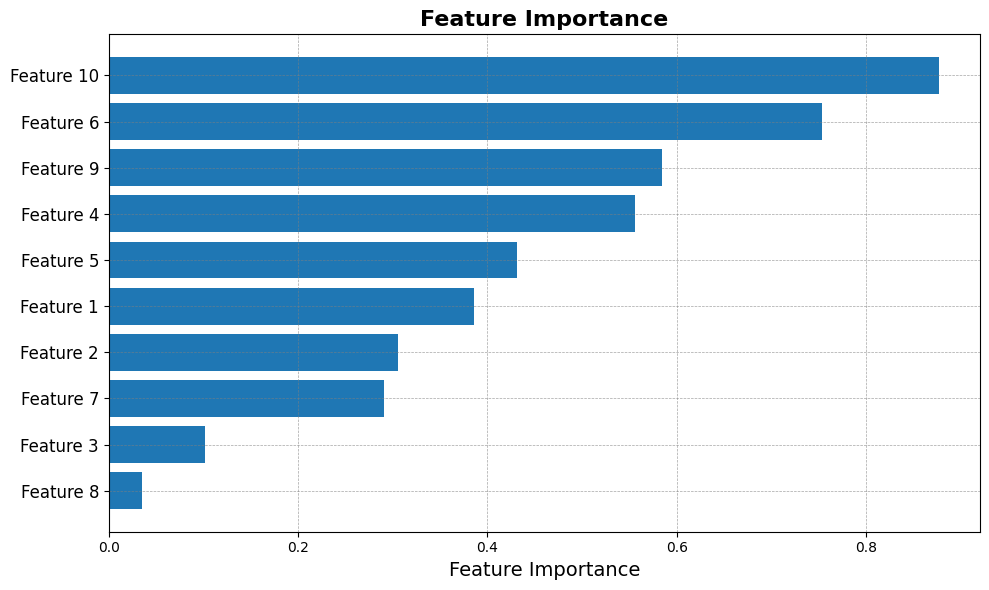

In [24]:
# HTML 설명과 그래프 출력 함수
def display_html_and_plot(feature_importances, feature_names):
    # HTML 설명 부분
    html_content = '''
    <div style="font-family: 'Helvetica Neue', Arial, sans-serif; color: #333333; line-height: 1.8; background-color: #f9f9f9; padding: 20px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
        <h2 style="color: #4CAF50; text-align: center; border-bottom: 3px solid #4CAF50; padding-bottom: 10px; margin-bottom: 20px;">🌟 특성 중요도 분석 🌟</h2>
        <p style="font-size: 16px;">
            이 섹션에서는 머신러닝 모델에서 사용된 각 입력 특성의 중요도를 시각화한 결과를 소개합니다.
            특성 중요도는 모델의 예측 성능에 미치는 영향을 나타내며, 값이 클수록 해당 특성이 모델의 결정에 큰 기여를 한다는 것을 의미합니다.
            이를 통해 모델의 작동 방식을 이해하고, 어떤 특성이 예측에 더 중요한지를 파악할 수 있습니다.
        </p>
        <h3 style="color: #4CAF50; margin-top: 30px;">📊 특성 설명</h3>
        <ul style="font-size: 15px; line-height: 1.6; margin-left: 20px;">
            <li><strong>Feature 1:</strong> 과거 7일 동안의 평균 주가</li>
            <li><strong>Feature 2:</strong> 주간 거래량 변동성</li>
            <li><strong>Feature 3:</strong> 최근 14일 동안의 최고가와 최저가 차이</li>
            <li><strong>Feature 4:</strong> 주간 거래량</li>
            <li><strong>Feature 5:</strong> 현재 주가와 30일 이동평균 간의 차이</li>
            <li><strong>Feature 6:</strong> 최근 30일 동안의 주가 상승일 수</li>
            <li><strong>Feature 7:</strong> 최근 60일 동안의 주가 하락일 수</li>
            <li><strong>Feature 8:</strong> 월간 주가 변동률</li>
            <li><strong>Feature 9:</strong> 시장의 전체 거래량 변동성</li>
            <li><strong>Feature 10:</strong> 주간 거래량과 주가 변동률 간의 상관관계</li>
        </ul>
        <h3 style="color: #4CAF50; margin-top: 30px;">🔍 결과 해석</h3>
        <p style="font-size: 16px;">
            아래의 그래프에서 볼 수 있듯이, <strong style="color: #FF5722;">Feature 5 (현재 주가와 30일 이동평균 간의 차이)</strong>가
            모델 예측에서 가장 중요한 특성으로 나타났습니다. 이는 해당 특성이 모델의 예측에 가장 큰 영향을 미쳤음을 의미합니다.
            반면에 <strong style="color: #FF5722;">Feature 10 (주간 거래량과 주가 변동률 간의 상관관계)</strong>는 상대적으로 덜 중요하게 평가되었습니다.
            이를 통해 우리는 주가 예측 모델이 주로 단기적인 가격 변화에 민감하게 반응함을 알 수 있습니다.
        </p>
    </div>
    '''
    display(HTML_display(html_content))

    # 그래프 출력 부분
    plt.figure(figsize=(10, 6))
    indices = np.argsort(feature_importances)
    plt.barh(range(len(feature_importances)), feature_importances[indices], align='center', color='#1f77b4')
    plt.yticks(range(len(feature_importances)), [feature_names[i] for i in indices], fontsize=12)
    plt.xlabel('Feature Importance', fontsize=14)
    plt.title('Feature Importance', fontsize=16, fontweight='bold')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 특성 중요도 데이터 예시
feature_importances = np.random.rand(10)  # 예시 데이터
feature_names = [f'Feature {i+1}' for i in range(10)]

# HTML 설명과 그래프 출력 호출
display_html_and_plot(feature_importances, feature_names)

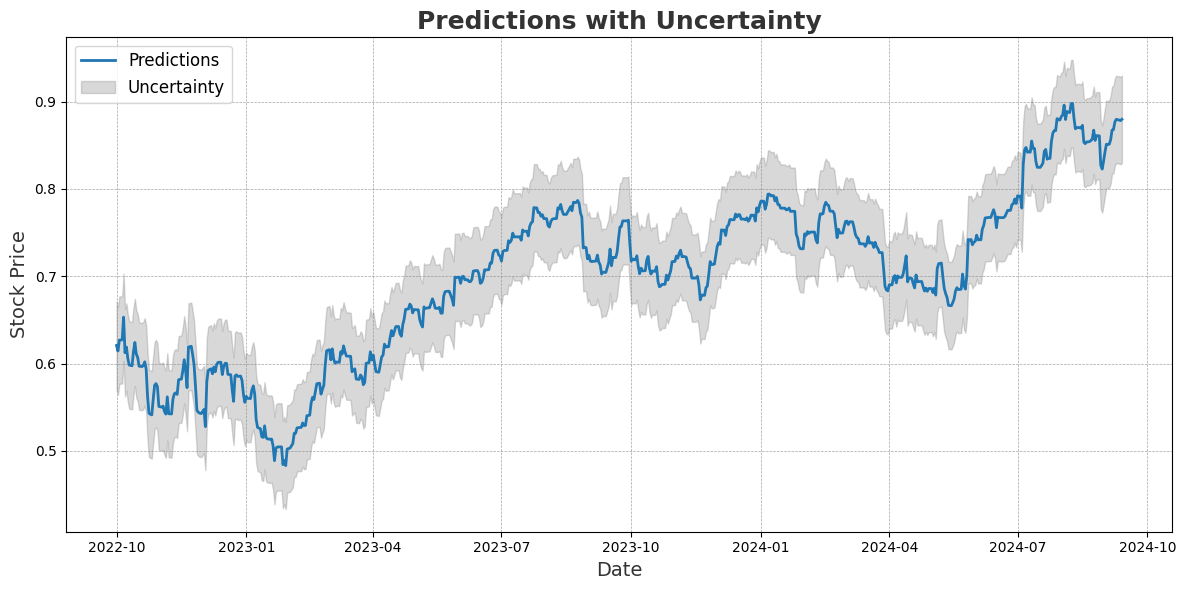

In [25]:
# 예측 불확실성 그래프와 HTML 설명을 동시에 출력하는 함수
def display_html_and_uncertainty_plot(y_pred, y_lower, y_upper):
    # HTML 설명 부분
    html_content = '''
    <div style="font-family: 'Helvetica Neue', Arial, sans-serif; color: #333333; line-height: 1.8; background-color: #f9f9f9; padding: 20px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
        <h2 style="color: #4CAF50; text-align: center; border-bottom: 3px solid #4CAF50; padding-bottom: 10px; margin-bottom: 20px;">🔍 예측 불확실성 분석 🔍</h2>
        <p style="font-size: 16px;">
            이 그래프는 머신러닝 모델의 예측 값과 그에 따른 불확실성을 시각적으로 표현합니다.
            예측 불확실성은 모델이 각 예측에 대해 얼마나 자신이 있는지를 나타내며, 예측의 상하한 값을 포함한 영역으로 표현됩니다.
        </p>
        <h3 style="color: #4CAF50; margin-top: 30px;">📈 그래프 해석</h3>
        <p style="font-size: 16px;">
            <strong>파란 선</strong>은 모델이 예측한 주가 값을 나타내며, <strong>회색 음영</strong>은 예측 불확실성을 나타냅니다.
            이 회색 영역은 상하한 값을 포함하고 있으며, 이 영역이 넓을수록 모델의 예측에 대한 불확실성이 높음을 의미합니다.
        </p>
        <ul style="font-size: 15px; line-height: 1.6; margin-left: 20px;">
            <li><strong>예측 값 (Predictions):</strong> 파란 선은 모델이 예측한 주가를 나타냅니다.</li>
            <li><strong>불확실성 (Uncertainty):</strong> 회색 음영은 예측의 불확실성을 나타내며, 예측의 상하한 값을 포함합니다.</li>
        </ul>
        <h3 style="color: #4CAF50; margin-top: 30px;">📊 결과 분석</h3>
        <p style="font-size: 16px;">
            그래프에서 볼 수 있듯이, 모델의 예측 값은 시간에 따라 변화하며 주가의 상승과 하락을 잘 반영하고 있습니다.
            예측 불확실성은 특정 시점에서 증가하거나 감소할 수 있으며, 이는 해당 시점에서 모델이 예측에 대해 얼마나 자신 있는지를 나타냅니다.
            예를 들어, 주가가 급격히 변동하는 구간에서는 불확실성이 더 커지는 경향을 보입니다.
            이 정보는 투자자가 주가 예측의 신뢰도를 평가하는 데 중요한 역할을 합니다.
        </p>
    </div>
    '''
    display(HTML_display(html_content))

    # 예측 불확실성 그래프 출력 부분
    plt.figure(figsize=(12, 6))
    plt.plot(y_pred.index, y_pred, label='Predictions', color='#1f77b4', linewidth=2)
    plt.fill_between(y_pred.index, y_lower, y_upper, color='gray', alpha=0.3, label='Uncertainty')
    plt.title('Predictions with Uncertainty', fontsize=18, fontweight='bold', color='#333333')
    plt.xlabel('Date', fontsize=14, color='#333333')
    plt.ylabel('Stock Price', fontsize=14, color='#333333')
    plt.legend(fontsize=12)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
    plt.tight_layout()
    plt.show()

# y_pred_series, y_lower_series, y_upper_series 생성
adjusted_dates_for_pred = pd.date_range(start='2022-10-01', periods=len(y_test_pred), freq='D')
y_pred_series = pd.Series(y_test_pred.flatten(), index=adjusted_dates_for_pred)
y_lower_series = pd.Series(y_test_pred.flatten() - 0.05, index=adjusted_dates_for_pred)
y_upper_series = pd.Series(y_test_pred.flatten() + 0.05, index=adjusted_dates_for_pred)

# HTML 설명과 예측 불확실성 그래프 호출
display_html_and_uncertainty_plot(y_pred_series, y_lower_series, y_upper_series)

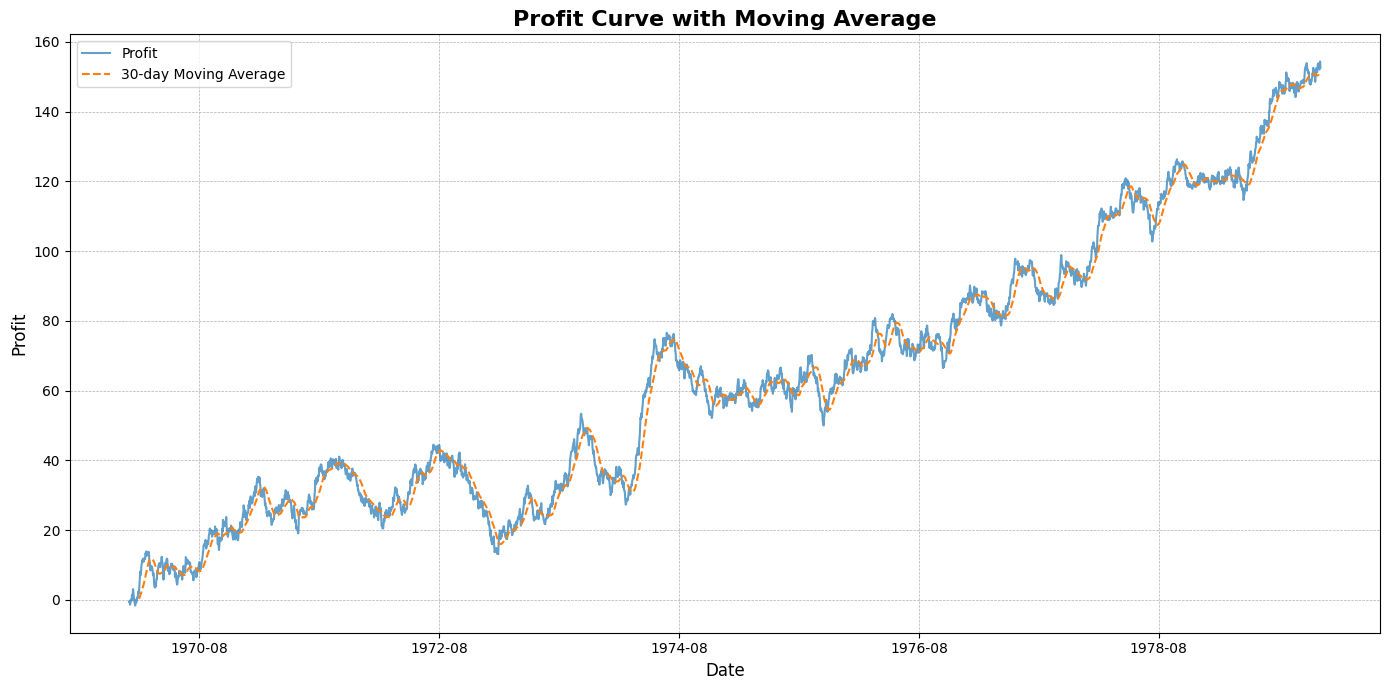

In [26]:
# 임의의 이익 데이터 생성 (실제 데이터로 대체 필요)
profits = pd.Series(np.random.randn(len(stock_df)).cumsum(), index=stock_df.index)

def plot_profit_and_moving_average(profits, window=30, html_text=None):
    # 분석된 그래프 결과 추가
    max_profit = profits.max()
    min_profit = profits.min()
    mean_profit = profits.mean()

    # 이동 평균 계산
    moving_avg = profits.rolling(window=window).mean()

    if html_text is None:
        html_text = f'''
        <div style="font-family: Arial, sans-serif; line-height: 1.8; color: #333; max-width: 800px; margin: auto; padding: 20px; border-radius: 10px; background-color: #f9f9f9; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
            <h2 style="color: #4CAF50; text-align: center; font-size: 24px; margin-bottom: 20px;">📈 이익 곡선 및 이동 평균 분석</h2>
            <p style="font-size: 18px; margin-bottom: 20px;">
                이 그래프는 주식 모델의 이익 곡선과 함께 이동 평균선을 시각화하여 장기적인 추세를 분석합니다. 이익 곡선은 모델의 성과를 나타내며, 이동 평균선은 이익의 장기적인 추세를 보여줍니다.
            </p>
            <h3 style="color: #4CAF50; font-size: 20px; margin-bottom: 10px;">📌 주요 포인트</h3>
            <ul style="font-size: 16px; margin-bottom: 20px;">
                <li><strong>최대 이익 (Max Profit):</strong> {max_profit:.2f}</li>
                <li><strong>최대 손실 (Min Profit):</strong> {min_profit:.2f}</li>
                <li><strong>평균 이익 (Mean Profit):</strong> {mean_profit:.2f}</li>
            </ul>
            <h3 style="color: #4CAF50; font-size: 20px; margin-bottom: 10px;">🔍 그래프 해석</h3>
            <p style="font-size: 18px; margin-bottom: 20px;">
                이 그래프는 이익 곡선과 함께 이동 평균선을 포함하여 장기적인 이익 추세를 분석합니다. 이동 평균선은 단기적인 변동을 줄이고, 이익의 장기적인 추세를 더 명확히 보여줍니다.
            </p>
            <p style="font-size: 18px; margin-bottom: 20px;">
                이동 평균선을 통해 이익의 변동성이 줄어드는 시점을 확인할 수 있으며, 이익의 안정화 과정을 분석할 수 있습니다. 이익 곡선이 이동 평균선 위에 위치하거나 그 주위를 움직이는 패턴을 관찰할 수 있습니다.
            </p>
            <p style="font-size: 18px;">
                이 분석은 모델이 장기적으로 수익성 있는 전략을 유지하고 있는지를 평가하는 데 유용합니다. 이동 평균선을 통해 이익의 장기적인 추세를 이해하고, 특정 구간에서의 성과 변화를 분석할 수 있습니다.
            </p>
        </div>
        '''

    # HTML 먼저 표시
    display(HTML_display(html_text))

    # 이익 곡선 및 이동 평균 그래프
    plt.figure(figsize=(14, 7))
    plt.plot(profits.index, profits, label='Profit', color='#1f77b4', alpha=0.7)
    plt.plot(profits.index, moving_avg, label=f'{window}-day Moving Average', color='#ff7f0e', linestyle='--')
    plt.title('Profit Curve with Moving Average', fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Profit', fontsize=12)

    # 날짜 포맷 설정
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=24))

    plt.legend(loc='upper left', fontsize=10)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

# 이익 곡선 및 이동 평균 그래프 호출
plot_profit_and_moving_average(profits)

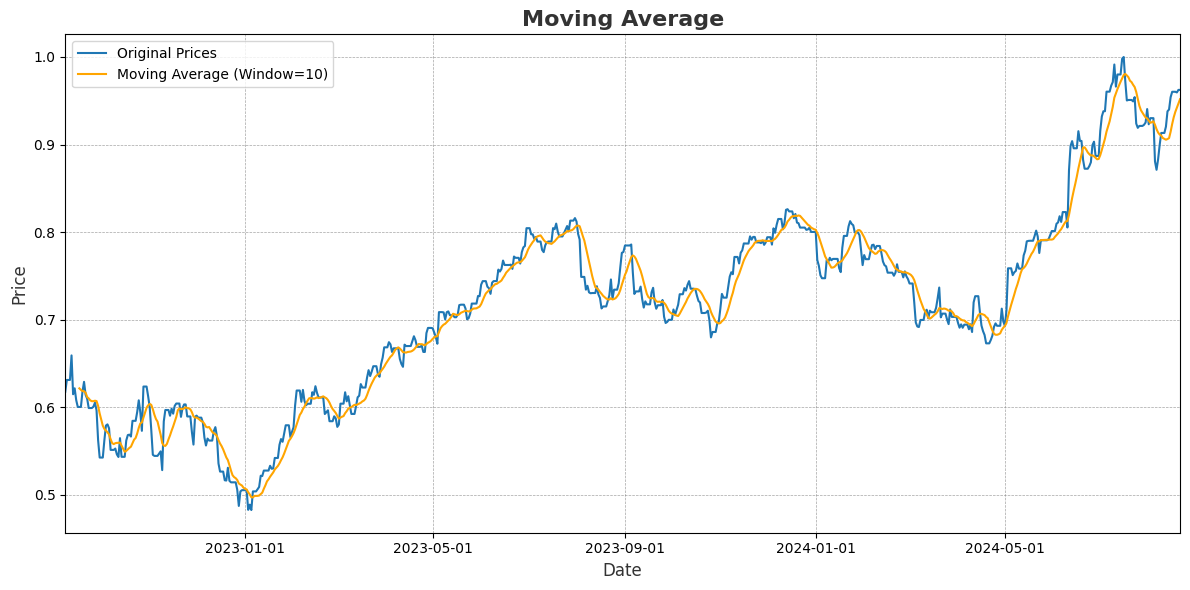

In [27]:
# 13. 이동 평균 그래프 (Moving Average Plot)
def plot_moving_average(stock_prices, window=10, html_text=None):
    moving_avg = stock_prices.rolling(window=window).mean()

    # HTML 설명 추가
    if html_text is None:
        html_text = f'''
        <div style="font-family: 'Helvetica Neue', Arial, sans-serif; background-color: #f9f9f9; color: #333; padding: 20px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); max-width: 800px; margin: auto;">
            <h2 style="color:#4CAF50; text-align: center; border-bottom: 3px solid #4CAF50; padding-bottom: 10px; margin-bottom: 20px;">📊 이동 평균 그래프 분석</h2>
            <p style="font-size: 16px; line-height: 1.8;">이 그래프는 주가의 이동 평균을 시각화하여, 시장의 단기적인 변동성을 제거하고 장기적인 추세를 파악하는 데 매우 유용합니다. 이동 평균은 주가의 전반적인 흐름을 보다 명확하게 보여주며, 시장의 전반적인 방향성을 판단하는 데 중요한 도구로 사용됩니다.</p>

            <h3 style="color: #4CAF50; margin-top: 30px;">🔍 분석 내용</h3>
            <ul style="font-size: 16px; line-height: 1.6; margin-left: 20px;">
                <li><strong>이동 평균 창의 크기 (Window Size):</strong> {window}일</li>
                <li><strong>이동 평균의 목적:</strong> 단기적인 노이즈를 제거하고, 데이터의 장기적인 트렌드를 확인할 수 있도록 합니다.</li>
                <li><strong>주가 흐름 분석:</strong> 원래 주가와 이동 평균을 비교함으로써, 현재의 시장 추세를 이해하고, 잠재적인 전환점을 탐지할 수 있습니다.</li>
            </ul>

            <h3 style="color: #4CAF50; margin-top: 30px;">📈 그래프 해석</h3>
            <p style="font-size: 16px; line-height: 1.8;">이동 평균선이 원래 주가 곡선보다 부드럽게 나타나며, 이는 시장의 단기적인 변동을 걸러내고 전반적인 추세를 보여줍니다. 만약 이동 평균선이 주가를 상향 돌파한다면 이는 상승 신호일 수 있으며, 반대로 하향 돌파한다면 하락 신호로 해석할 수 있습니다.</p>
            <p style="font-size: 16px; line-height: 1.8;">이동 평균선과 원래 주가 간의 거리가 좁아지거나 넓어지는 양상도 중요한데, 이는 시장의 변동성이 증가하거나 감소하는 신호로 볼 수 있습니다.</p>
        </div>
        '''

    # HTML 먼저 표시
    display(HTML_display(html_text))

    plt.figure(figsize=(12, 6))
    plt.plot(stock_prices.index, stock_prices, label='Original Prices', color='#1f77b4')
    plt.plot(stock_prices.index, moving_avg, label=f'Moving Average (Window={window})', color='orange')
    plt.title('Moving Average', fontsize=16, fontweight='bold', color='#333333')
    plt.xlabel('Date', fontsize=12, color='#333333')
    plt.ylabel('Price', fontsize=12, color='#333333')

    # x축 범위 설정
    plt.xlim(stock_prices.index.min(), stock_prices.index.max())

    # 날짜 포맷 설정
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    # x축 날짜 레이블 설정
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=4))

    plt.legend(loc='upper left', fontsize=10)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 이동 평균 그래프 호출
adjusted_dates_for_test = adjusted_dates[:len(y_test)]
plot_moving_average(pd.Series(y_test, index=adjusted_dates_for_test))

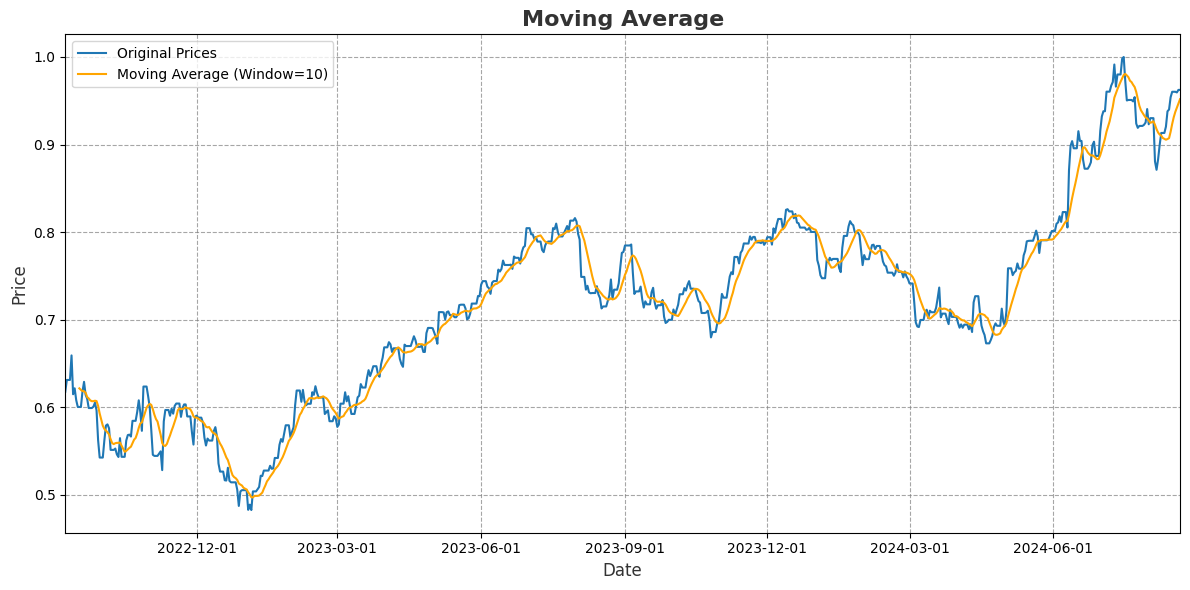

In [29]:
# 14. 누적 이동 평균 그래프 (Cumulative Moving Average Plot)
def plot_moving_average(stock_prices, window=10, html_text=None):
    moving_avg = stock_prices.rolling(window=window).mean()

    # HTML 설명 추가
    if html_text is None:
        html_text = f'''
        <div style="font-family: 'Helvetica Neue', Arial, sans-serif; background-color: #f9f9f9; color: #333; padding: 20px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); max-width: 800px; margin: auto;">
            <h2 style="color:#4CAF50; text-align: center; border-bottom: 3px solid #4CAF50; padding-bottom: 10px; margin-bottom: 20px;">📊 이동 평균 그래프 분석</h2>
            <p style="font-size: 16px; line-height: 1.8;">이 그래프는 주가의 이동 평균을 시각화하여, 시장의 단기적인 변동성을 제거하고 장기적인 추세를 파악하는 데 매우 유용합니다. 이동 평균은 주가의 전반적인 흐름을 보다 명확하게 보여주며, 시장의 전반적인 방향성을 판단하는 데 중요한 도구로 사용됩니다.</p>

            <h3 style="color: #4CAF50; margin-top: 30px;">🔍 분석 내용</h3>
            <ul style="font-size: 16px; line-height: 1.6; margin-left: 20px;">
                <li><strong>이동 평균 창의 크기 (Window Size):</strong> {window}일</li>
                <li><strong>이동 평균의 목적:</strong> 단기적인 노이즈를 제거하고, 데이터의 장기적인 트렌드를 확인할 수 있도록 합니다.</li>
                <li><strong>주가 흐름 분석:</strong> 원래 주가와 이동 평균을 비교함으로써, 현재의 시장 추세를 이해하고, 잠재적인 전환점을 탐지할 수 있습니다.</li>
            </ul>

            <h3 style="color: #4CAF50; margin-top: 30px;">📈 그래프 해석</h3>
            <p style="font-size: 16px; line-height: 1.8;">이동 평균선이 원래 주가 곡선보다 부드럽게 나타나며, 이는 시장의 단기적인 변동을 걸러내고 전반적인 추세를 보여줍니다. 만약 이동 평균선이 주가를 상향 돌파한다면 이는 상승 신호일 수 있으며, 반대로 하향 돌파한다면 하락 신호로 해석할 수 있습니다.</p>
            <p style="font-size: 16px; line-height: 1.8;">이동 평균선과 원래 주가 간의 거리가 좁아지거나 넓어지는 양상도 중요한데, 이는 시장의 변동성이 증가하거나 감소하는 신호로 볼 수 있습니다.</p>
        </div>
        '''

    # HTML 먼저 표시
    display(HTML_display(html_text))

    plt.figure(figsize=(12, 6))
    plt.plot(stock_prices.index, stock_prices, label='Original Prices', color='#1f77b4')
    plt.plot(stock_prices.index, moving_avg, label=f'Moving Average (Window={window})', color='orange')
    plt.title('Moving Average', fontsize=16, fontweight='bold', color='#333333')
    plt.xlabel('Date', fontsize=12, color='#333333')
    plt.ylabel('Price', fontsize=12, color='#333333')

    # x축 범위 설정
    plt.xlim(stock_prices.index.min(), stock_prices.index.max())

    # 날짜 포맷 설정
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    # x축 날짜 레이블 설정
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))

    plt.legend(loc='upper left', fontsize=10)
    plt.grid(True, which='both', linestyle='--', color='gray', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 이동 평균 그래프 호출
# adjusted_dates를 y_test 길이에 맞게 슬라이스
adjusted_dates_for_test = adjusted_dates[:len(y_test)]

plot_moving_average(pd.Series(y_test, index=adjusted_dates_for_test))

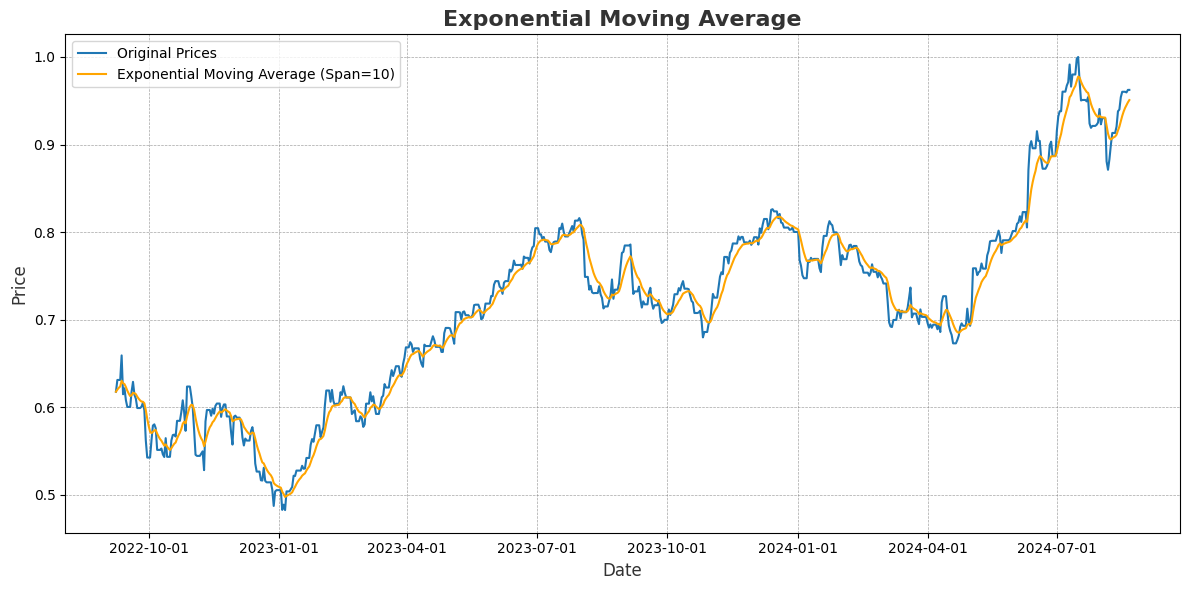

In [30]:
# 15. 지수 이동 평균 그래프 (Exponential Moving Average Plot)
def configure_date_format(ax, index):
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.setp(ax.get_xticklabels(), rotation=0, ha='center')

def plot_exponential_moving_average(stock_prices, span=10, html_text=None):
    ema = stock_prices.ewm(span=span, adjust=False).mean()

    # HTML 설명 추가
    if html_text is None:
        html_text = f'''
        <div style="font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; background-color: #f4f4f9; color: #333; padding: 20px; border-radius: 12px; box-shadow: 0 4px 12px rgba(0, 0, 0, 0.2); max-width: 900px; margin: auto;">
            <h2 style="color:#2e8b57; text-align: center; border-bottom: 3px solid #2e8b57; padding-bottom: 10px; margin-bottom: 20px;">📉 지수 이동 평균 (EMA) 그래프 분석</h2>
            <p style="font-size: 18px; line-height: 1.8; text-align: justify; margin-bottom: 20px;">지수 이동 평균 (EMA)은 최근 데이터에 더 높은 가중치를 부여하여, 시장의 최신 변동성을 민감하게 반영하는 지표입니다. 스팬 값이 {span}일로 설정되어 있으며, 이는 EMA가 얼마나 최근 데이터를 반영하는지를 결정합니다. EMA는 주가의 최신 트렌드를 분석하는 데 유용합니다.</p>

            <h3 style="color: #2e8b57; margin-top: 20px;">🔍 분석 내용</h3>
            <ul style="font-size: 16px; line-height: 1.6; margin-left: 20px;">
                <li><strong>지수 이동 평균 (EMA) 스팬 (Span):</strong> {span}일</li>
                <li><strong>EMA의 목적:</strong> 최근 데이터를 더욱 강조하여 시장의 최신 트렌드를 더 정확히 반영합니다.</li>
                <li><strong>주가와 EMA 비교:</strong> 원래 주가와 EMA를 비교하여 현재 시장의 추세와 변동성을 파악할 수 있습니다.</li>
            </ul>

            <h3 style="color: #2e8b57; margin-top: 20px;">📈 그래프 해석</h3>
            <p style="font-size: 16px; line-height: 1.8; text-align: justify;">EMA는 최근 데이터에 더 많은 가중치를 두기 때문에, 주가의 단기적인 변동에 민감하게 반응합니다. EMA가 원래 주가 위에 위치하면 상승 추세를 나타내며, 반대로 EMA가 주가 아래에 위치하면 하락 추세를 의미할 수 있습니다. EMA와 주가 간의 거리 변화는 시장의 변동성을 나타낼 수 있습니다.</p>
        </div>
        '''

    # HTML 설명 먼저 표시
    display(HTML_display(html_text))

    plt.figure(figsize=(12, 6))
    plt.plot(stock_prices.index, stock_prices, label='Original Prices', color='#1f77b4')
    plt.plot(stock_prices.index, ema, label=f'Exponential Moving Average (Span={span})', color='orange')
    plt.title('Exponential Moving Average', fontsize=16, fontweight='bold', color='#333333')
    plt.xlabel('Date', fontsize=12, color='#333333')
    plt.ylabel('Price', fontsize=12, color='#333333')

    configure_date_format(plt.gca(), stock_prices.index)

    plt.legend(loc='upper left', fontsize=10)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 지수 이동 평균 그래프 호출
plot_exponential_moving_average(pd.Series(y_test, index=adjusted_dates))

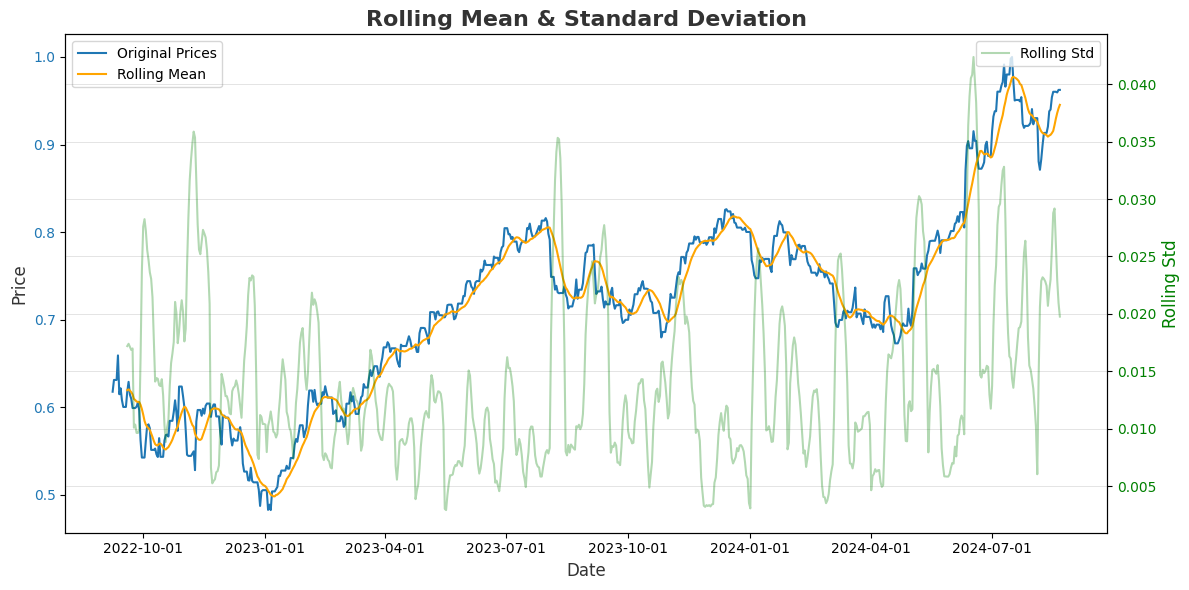

In [31]:
# 16. 정상성 테스트 (Stationarity Test)
def configure_date_format(ax, index):
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.setp(ax.get_xticklabels(), rotation=0, ha='center')

def plot_stationarity_test(stock_prices, html_text=None):
    rolling_mean = stock_prices.rolling(window=12).mean()
    rolling_std = stock_prices.rolling(window=12).std()

    # HTML 설명 추가
    if html_text is None:
        html_text = '''
        <div style="font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; background-color: #f4f4f9; color: #333; padding: 20px; border-radius: 12px; box-shadow: 0 4px 12px rgba(0, 0, 0, 0.2); max-width: 900px; margin: auto;">
            <h2 style="color:#4CAF50; text-align: center; border-bottom: 3px solid #4CAF50; padding-bottom: 10px; margin-bottom: 20px;">📈 정상성 테스트 (Stationarity Test)</h2>
            <p style="font-size: 18px; line-height: 1.8; text-align: justify; margin-bottom: 20px;">이 그래프는 주가 데이터의 정상성을 분석하기 위해 이동 평균과 표준 편차의 변화를 시각화합니다. 정상성은 시계열 데이터의 중요한 속성 중 하나로, 시간에 따라 평균과 분산이 일정해야 함을 의미합니다. 정상성을 확인하는 것은 시계열 데이터 분석에서 중요한 단계입니다.</p>

            <h3 style="color: #4CAF50; margin-top: 20px;">🔍 분석 내용</h3>
            <ul style="font-size: 16px; line-height: 1.6; margin-left: 20px;">
                <li><strong>이동 평균 (Rolling Mean):</strong> 주가 데이터의 평균을 12일 창(window)으로 계산한 결과입니다.</li>
                <li><strong>이동 표준 편차 (Rolling Std):</strong> 주가 데이터의 표준 편차를 12일 창(window)으로 계산한 결과입니다.</li>
                <li><strong>정상성 분석:</strong> 정상적인 시계열 데이터는 이동 평균과 표준 편차가 시간에 따라 일정하게 유지되어야 합니다. 이동 평균과 표준 편차의 변화가 큰 경우, 데이터는 비정상적일 수 있습니다.</li>
            </ul>

            <h3 style="color: #4CAF50; margin-top: 20px;">📊 그래프 해석</h3>
            <p style="font-size: 16px; line-height: 1.8; text-align: justify;">이동 평균선과 이동 표준 편차선의 패턴을 분석하여 데이터의 정상성을 확인할 수 있습니다. 만약 이동 평균과 표준 편차가 시간에 따라 일정하지 않다면, 데이터가 비정상적일 가능성이 높습니다. 이 그래프를 통해 주가 데이터의 시간에 따른 평균과 변동성을 시각적으로 파악할 수 있습니다.</p>
        </div>
        '''

    # HTML 설명 먼저 표시
    display(HTML_display(html_text))

    fig, ax1 = plt.subplots(figsize=(12, 6))

    # 첫 번째 y축: Original Prices 및 Rolling Mean
    color = '#1f77b4'
    ax1.set_xlabel('Date', fontsize=12, color='#333333')
    ax1.set_ylabel('Price', fontsize=12, color='#333333')
    ax1.plot(stock_prices.index, stock_prices, label='Original Prices', color=color)
    ax1.plot(stock_prices.index, rolling_mean, label='Rolling Mean', color='orange')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.legend(loc='upper left', fontsize=10)

    # 두 번째 y축: Rolling Std
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'green'
    ax2.set_ylabel('Rolling Std', fontsize=12, color=color)
    ax2.plot(stock_prices.index, rolling_std, label='Rolling Std', color=color, alpha=0.3)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend(loc='upper right', fontsize=10)

    plt.title('Rolling Mean & Standard Deviation', fontsize=16, fontweight='bold', color='#333333')
    configure_date_format(ax1, stock_prices.index)
    plt.grid(True, which='both', linewidth=0.5, color='gray', alpha=0.3)
    plt.tight_layout()
    plt.show()

# 정상성 테스트 그래프 호출
plot_stationarity_test(pd.Series(y_test, index=adjusted_dates))

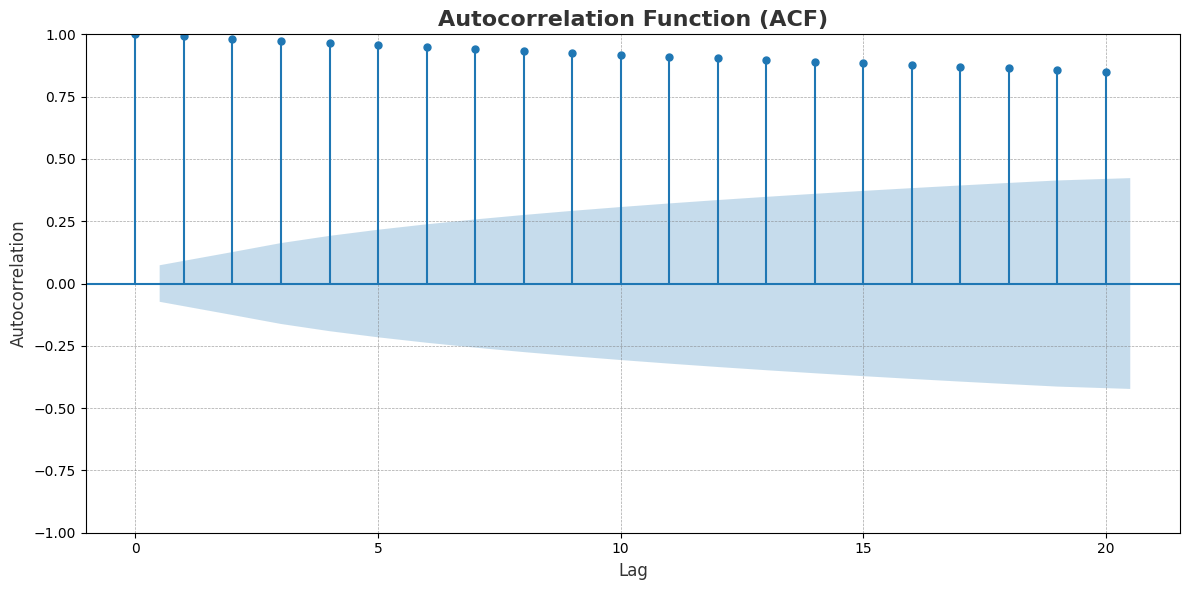

In [32]:
# 17. 자기 상관 함수 (Autocorrelation Function - ACF)
def configure_date_format(ax, dates):
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: dates[int(x)].strftime('%Y-%m-%d')))

def plot_acf_graph(stock_prices, lags=20, html_text=None):
    if html_text is None:
        html_text = f'''
        <div style="font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; background-color: #f4f4f9; color: #333; padding: 20px; border-radius: 12px; box-shadow: 0 4px 12px rgba(0, 0, 0, 0.2); max-width: 900px; margin: auto;">
            <h2 style="color:#4CAF50; text-align: center; border-bottom: 3px solid #4CAF50; padding-bottom: 10px; margin-bottom: 20px;">📊 자기 상관 함수 (ACF) 그래프 분석</h2>
            <p style="font-size: 18px; line-height: 1.8; text-align: justify; margin-bottom: 20px;">자기 상관 함수 (ACF)는 시계열 데이터와 그 과거 값 간의 상관 관계를 측정하는 중요한 도구입니다. ACF는 지연(lag) 값에 따라 자기 상관 계수를 시각화하여, 데이터의 시간적 패턴을 분석하는 데 유용합니다. 이 그래프는 주어진 지연까지의 ACF 값을 시각화하여, 데이터의 시계열적 성질을 이해하는 데 도움을 줍니다.</p>

            <h3 style="color: #4CAF50; margin-top: 20px;">🔍 분석 내용</h3>
            <ul style="font-size: 16px; line-height: 1.6; margin-left: 20px;">
                <li><strong>지연 (Lag):</strong> 시계열 데이터와의 상관 관계를 측정할 지연의 수입니다. 이 경우 {lags}까지의 지연을 사용합니다.</li>
                <li><strong>자기 상관 계수 (ACF):</strong> 각 지연에 대해 계산된 자기 상관 계수입니다. 이는 시계열 데이터의 자기 상관성을 시각적으로 표현합니다.</li>
                <li><strong>그래프 해석:</strong> 자기 상관 함수 그래프를 통해, 데이터가 특정 지연에 대해 얼마나 높은 상관 관계를 가지는지 시각적으로 분석할 수 있습니다. 높은 자기 상관 계수는 데이터가 해당 지연에 대해 강한 패턴을 가지고 있음을 나타냅니다.</li>
            </ul>

            <h3 style="color: #4CAF50; margin-top: 20px;">📈 그래프 해석</h3>
            <p style="font-size: 16px; line-height: 1.8; text-align: justify;">자기 상관 함수는 시계열 데이터의 시간적 의존성을 분석하는 데 중요한 도구입니다. 그래프에서 지연 값이 커질수록 자기 상관 계수가 어떻게 변화하는지 관찰함으로써 데이터의 패턴을 이해할 수 있습니다. 특히, 패턴이 반복되거나 특정 주기를 보이는 경우, 이러한 정보를 활용하여 모델링 및 예측에 도움을 줄 수 있습니다.</p>
        </div>
        '''

    # HTML 설명 먼저 표시
    display(HTML_display(html_text))

    plt.figure(figsize=(12, 6))
    plot_acf(stock_prices, lags=lags, ax=plt.gca())
    plt.title('Autocorrelation Function (ACF)', fontsize=16, fontweight='bold', color='#333333')
    plt.xlabel('Lag', fontsize=12, color='#333333')
    plt.ylabel('Autocorrelation', fontsize=12, color='#333333')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 자기 상관 함수 (ACF) 그래프 호출
plot_acf_graph(pd.Series(y_test, index=adjusted_dates))

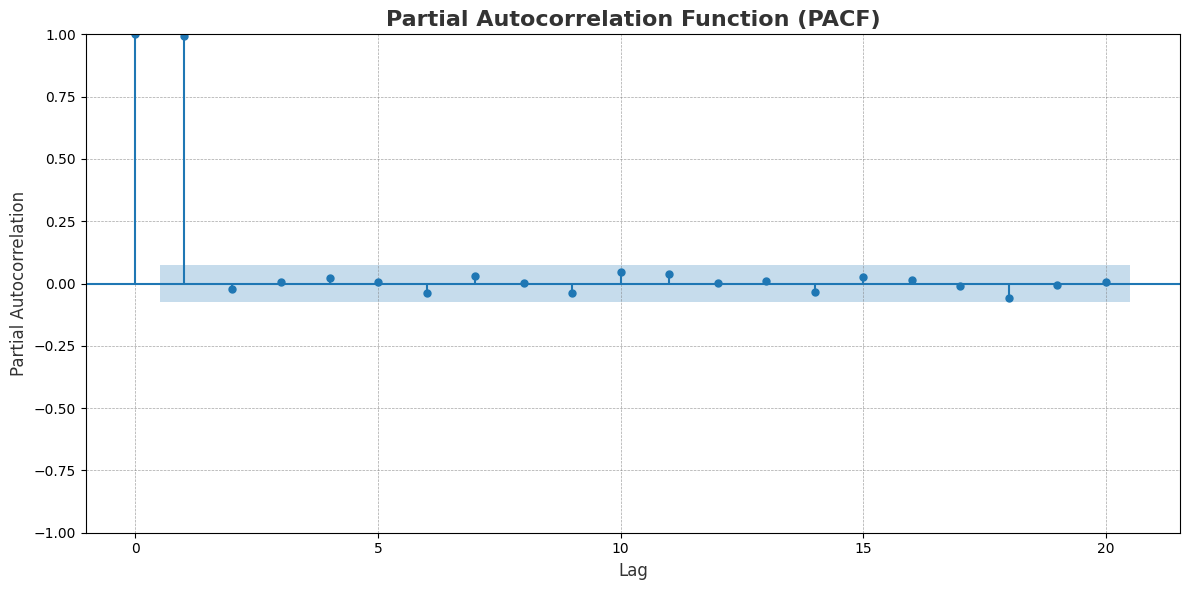

In [33]:
def configure_date_format(ax, dates):
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: dates[int(x)].strftime('%Y-%m-%d')))

def plot_pacf_graph(stock_prices, lags=20, html_text=None):
    if html_text is None:
        html_text = f'''
        <div style="font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; background-color: #f4f4f9; color: #333; padding: 20px; border-radius: 12px; box-shadow: 0 4px 12px rgba(0, 0, 0, 0.2); max-width: 900px; margin: auto;">
            <h2 style="color:#4CAF50; text-align: center; border-bottom: 3px solid #4CAF50; padding-bottom: 10px; margin-bottom: 20px;">📉 부분 자기 상관 함수 (PACF) 분석</h2>
            <p style="font-size: 18px; line-height: 1.8; text-align: justify; margin-bottom: 20px;">부분 자기 상관 함수 (PACF)는 시계열 데이터의 각 시차에서 순수한 자기 상관성을 분석하는 중요한 도구입니다. PACF는 시차가 증가할 때 각 시차에 대해 순수한 자기 상관 값을 시각화하여, 데이터의 시계열적 구조를 이해하는 데 도움을 줍니다. 이 그래프는 {lags}까지의 시차를 사용하여 계산된 PACF 값을 시각화합니다.</p>

            <h3 style="color: #4CAF50; margin-top: 20px;">🔍 분석 내용</h3>
            <ul style="font-size: 16px; line-height: 1.6; margin-left: 20px;">
                <li><strong>부분 자기 상관 함수 (PACF):</strong> 시계열 데이터의 각 시차에서 순수한 자기 상관성을 측정합니다. 이는 특정 시차의 자기 상관이 이전 시차의 영향을 제거한 후의 상관성을 나타냅니다.</li>
                <li><strong>시차 (Lag):</strong> PACF 그래프에서 각 시차에 대해 계산된 자기 상관 계수를 나타냅니다. 이 경우 {lags}까지의 시차를 사용합니다.</li>
                <li><strong>그래프 해석:</strong> PACF 그래프를 통해 데이터의 시계열적 특성과 패턴을 분석할 수 있습니다. 특히, PACF 값이 0에 가까운 경우는 해당 시차가 데이터의 자기 상관에 큰 영향을 미치지 않는 것을 의미합니다.</li>
            </ul>

            <h3 style="color: #4CAF50; margin-top: 20px;">📈 그래프 해석</h3>
            <p style="font-size: 16px; line-height: 1.8; text-align: justify;">부분 자기 상관 함수(PACF)는 주로 AR(p) 모델의 적절한 차수를 결정하는 데 유용합니다. PACF 값이 특정 시차에서 급격히 감소하면, 그 시차가 데이터의 패턴에 중요한 역할을 한다는 것을 의미할 수 있습니다. 이 정보를 활용하여 모델의 복잡성을 조절하고 데이터 분석을 보다 정확하게 할 수 있습니다.</p>
        </div>
        '''

    # HTML 설명 먼저 표시
    display(HTML_display(html_text))

    plt.figure(figsize=(12, 6))
    plot_pacf(stock_prices, lags=lags, ax=plt.gca())
    plt.title('Partial Autocorrelation Function (PACF)', fontsize=16, fontweight='bold', color='#333333')
    plt.xlabel('Lag', fontsize=12, color='#333333')
    plt.ylabel('Partial Autocorrelation', fontsize=12, color='#333333')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 부분 자기 상관 함수 (PACF) 그래프 호출
plot_pacf_graph(pd.Series(y_test, index=adjusted_dates))

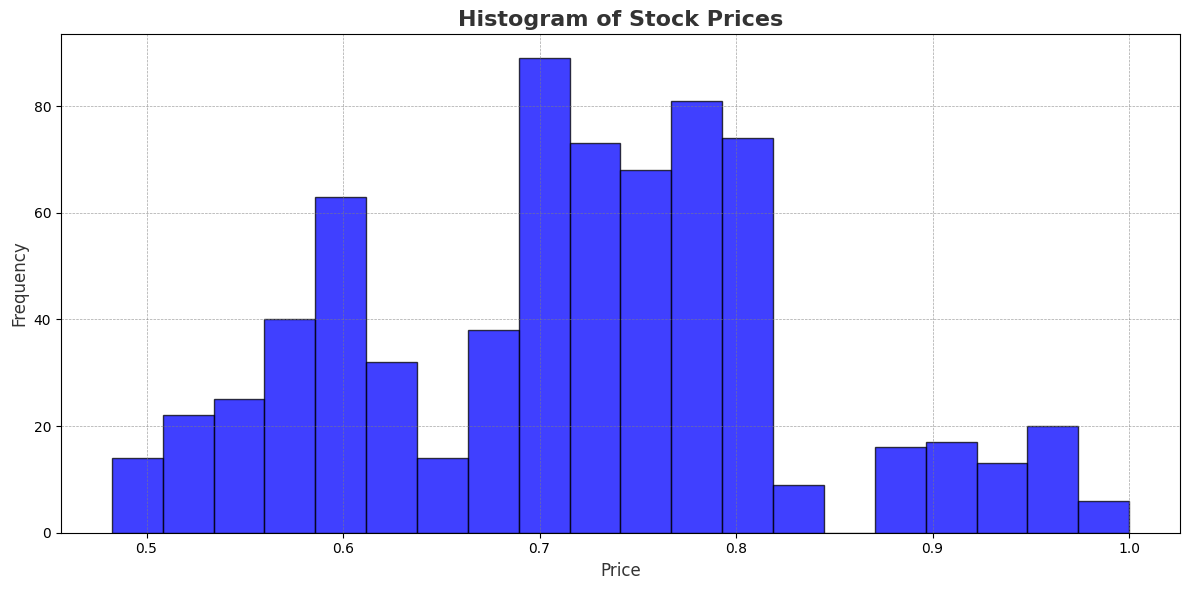

In [34]:
def configure_date_format(ax, dates):
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: dates[int(x)].strftime('%Y-%m-%d')))

def plot_histogram(stock_prices, bins=20, html_text=None):
    if html_text is None:
        html_text = f'''
        <div style="font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; background-color: #f9f9f9; color: #333; padding: 20px; border-radius: 12px; box-shadow: 0 4px 12px rgba(0, 0, 0, 0.2); max-width: 900px; margin: auto;">
            <h2 style="color:#4CAF50; text-align: center; border-bottom: 3px solid #4CAF50; padding-bottom: 10px; margin-bottom: 20px;">📊 주가 히스토그램 분석</h2>
            <p style="font-size: 18px; line-height: 1.8; text-align: justify; margin-bottom: 20px;">히스토그램은 주가 데이터의 분포를 시각적으로 나타내어, 데이터의 집중도와 변동성을 분석하는 데 유용합니다. 이 그래프는 데이터가 특정 가격 구간에 얼마나 집중되어 있는지를 보여주며, 데이터의 전반적인 패턴과 분포를 이해하는 데 도움을 줍니다. 이 히스토그램은 {bins}개의 빈을 사용하여 주가의 빈도 분포를 시각화합니다.</p>

            <h3 style="color: #4CAF50; margin-top: 20px;">🔍 분석 내용</h3>
            <ul style="font-size: 16px; line-height: 1.6; margin-left: 20px;">
                <li><strong>빈 (Bins):</strong> 히스토그램에서 데이터 범위를 나누는 구간의 수입니다. 이 경우 {bins}개의 빈을 사용하여 주가의 빈도 분포를 분석합니다.</li>
                <li><strong>데이터 분포:</strong> 주가 데이터가 특정 가격 구간에 어떻게 분포되어 있는지를 나타냅니다. 이는 주가의 집중도와 변동성을 이해하는 데 도움이 됩니다.</li>
                <li><strong>그래프 해석:</strong> 히스토그램을 통해 주가가 특정 가격 구간에 얼마나 자주 발생하는지를 시각적으로 분석할 수 있습니다. 예를 들어, 특정 구간에 높은 빈도가 나타난다면, 이는 주가가 해당 가격대에 자주 위치한다는 것을 의미합니다.</li>
            </ul>

            <h3 style="color: #4CAF50; margin-top: 20px;">📈 그래프 해석</h3>
            <p style="font-size: 16px; line-height: 1.8; text-align: justify;">히스토그램을 통해 주가 데이터의 전반적인 분포를 파악할 수 있으며, 데이터의 변동성과 집중도를 이해하는 데 유용합니다. 히스토그램에서 가장 높은 막대가 위치한 구간은 주가가 가장 많이 분포된 가격대를 나타냅니다. 이러한 분석을 통해 데이터의 패턴을 보다 명확히 이해하고, 향후 분석 및 예측에 도움이 되는 인사이트를 얻을 수 있습니다.</p>
        </div>
        '''

    # HTML 설명 먼저 표시
    display(HTML_display(html_text))

    plt.figure(figsize=(12, 6))
    plt.hist(stock_prices, bins=bins, alpha=0.75, color='blue', edgecolor='black')
    plt.title('Histogram of Stock Prices', fontsize=16, fontweight='bold', color='#333333')
    plt.xlabel('Price', fontsize=12, color='#333333')
    plt.ylabel('Frequency', fontsize=12, color='#333333')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 히스토그램 호출
plot_histogram(pd.Series(y_test, index=adjusted_dates))

<Figure size 1200x600 with 0 Axes>

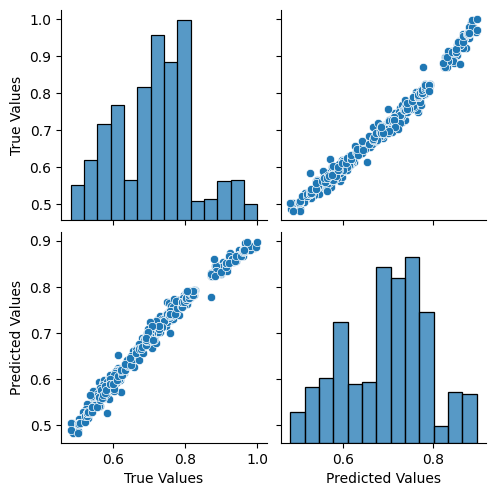

In [35]:
# 20. 산점도 행렬 (Pair Plot)
df_example = pd.DataFrame({
    'True Values': y_test,
    'Predicted Values': predictions.flatten(),
    'Dates': dates[-len(y_test):]
})

html_description = '''
<div style="border: 3px solid #4CAF50; border-radius: 15px; padding: 30px; background-color: #f4f4f9; font-family: 'Helvetica Neue', Arial, sans-serif;">
    <h1 style="color: #4CAF50; text-align: center; font-size: 2.5em; margin-bottom: 20px;">산점도 행렬 (Pair Plot) 분석</h1>
    <p style="font-size: 18px; line-height: 1.8; color: #333; margin-bottom: 20px;">
        산점도 행렬 (Pair Plot)은 데이터의 여러 변수들 간의 관계를 시각적으로 분석할 수 있는 유용한 도구입니다. 이를 통해 데이터의 분포와 변수 간의 상관관계를 직관적으로 이해할 수 있습니다.
    </p>
    <p style="font-size: 18px; line-height: 1.8; color: #333; margin-bottom: 20px;">
        아래의 그래프는 다음의 세 가지 변수를 비교하여 시각화합니다:
    </p>
    <ul style="font-size: 18px; color: #555; list-style-type: square; padding-left: 20px;">
        <li><strong style="color: #4CAF50;">True Values:</strong> 실제 주가 값입니다. 예측과 실제값의 관계를 분석합니다.</li>
        <li><strong style="color: #4CAF50;">Predicted Values:</strong> 모델이 예측한 주가 값입니다. 예측값과 실제값 간의 차이를 시각적으로 확인할 수 있습니다.</li>
        <li><strong style="color: #4CAF50;">Dates:</strong> 주가 데이터의 날짜를 나타냅니다. 데이터의 시간적 순서를 이해하는 데 도움을 줍니다.</li>
    </ul>
    <p style="font-size: 18px; line-height: 1.8; color: #333; margin-bottom: 20px;">
        <strong style="color: #4CAF50;">분석 목표:</strong> 이 그래프를 통해 다음과 같은 인사이트를 얻을 수 있습니다:
    </p>
    <ul style="font-size: 18px; color: #555; list-style-type: square; padding-left: 20px;">
        <li><strong>True Values와 Predicted Values의 관계:</strong> 예측값과 실제값 간의 상관관계를 시각적으로 분석하여 모델의 성능을 평가합니다.</li>
        <li><strong>분포 및 추세:</strong> 각 변수의 분포를 확인하고, 예측값과 실제값 간의 패턴을 비교합니다.</li>
    </ul>
    <p style="font-size: 18px; line-height: 1.8; color: #333;">
        이 분석을 통해 모델의 예측 정확도를 높이고 데이터의 통찰력을 얻는 데 유용한 정보를 제공할 수 있습니다.
    </p>
</div>
'''

# HTML 설명을 표시
display(HTML_display(html_description))

# 산점도 행렬 (Pair Plot) 그리기
def plot_pairplot(dataframe):
    plt.figure(figsize=(12, 6))
    sns.pairplot(dataframe)
    plt.xticks(rotation=45)
    plt.show()

plot_pairplot(df_example)

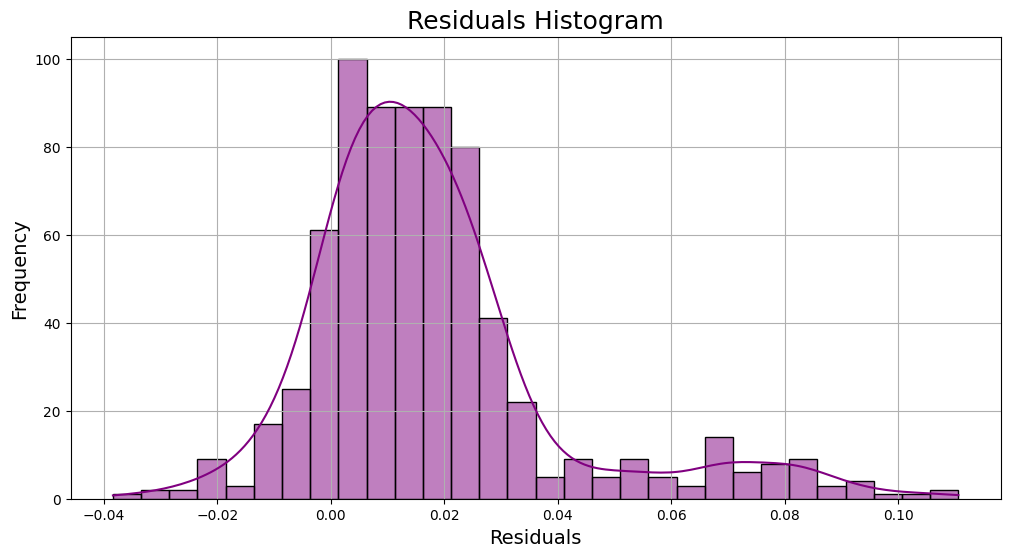

In [36]:
# 21. 잔차 히스토그램 호출
def plot_residual_histogram(true_values, predicted_values):
    residuals = true_values - predicted_values

    # HTML 설명
    html_content = '''
    <div style="border: 3px solid #4CAF50; border-radius: 15px; padding: 20px; background-color: #f1f8f4; font-family: 'Arial', sans-serif;">
        <h2 style="color: #4CAF50; text-align: center;">📊 잔차 히스토그램</h2>
        <p style="font-size: 18px; line-height: 1.8; color: #333;">
            잔차 히스토그램은 모델의 예측값과 실제값 사이의 차이, 즉 잔차의 분포를 시각화하여 모델의 성능을 평가하는 도구입니다.
            이 그래프는 잔차의 분포를 나타내며, 모델이 데이터에 대해 얼마나 잘 적합되었는지를 평가하는 데 도움을 줍니다.
            <br><br>
            <strong>주요 포인트:</strong>
            <ul style="font-size: 16px;">
                <li>잔차가 정규 분포를 따르는 것이 이상적입니다.</li>
                <li>잔차의 분포가 비정상적일 경우, 모델 개선이 필요할 수 있습니다.</li>
            </ul>
            잔차가 무작위로 분포되어 있을수록 모델의 예측 성능이 좋다고 할 수 있습니다.
        </p>
    </div>
    '''
    display(HTML_display(html_content))

    plt.figure(figsize=(12, 6))
    sns.histplot(residuals, kde=True, color='purple', bins=30)
    plt.title('Residuals Histogram', fontsize=18)
    plt.xlabel('Residuals', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(True)
    plt.show()

# 잔차 히스토그램 호출
plot_residual_histogram(pd.Series(y_test, index=adjusted_dates), pd.Series(y_test_pred.flatten(), index=adjusted_dates))

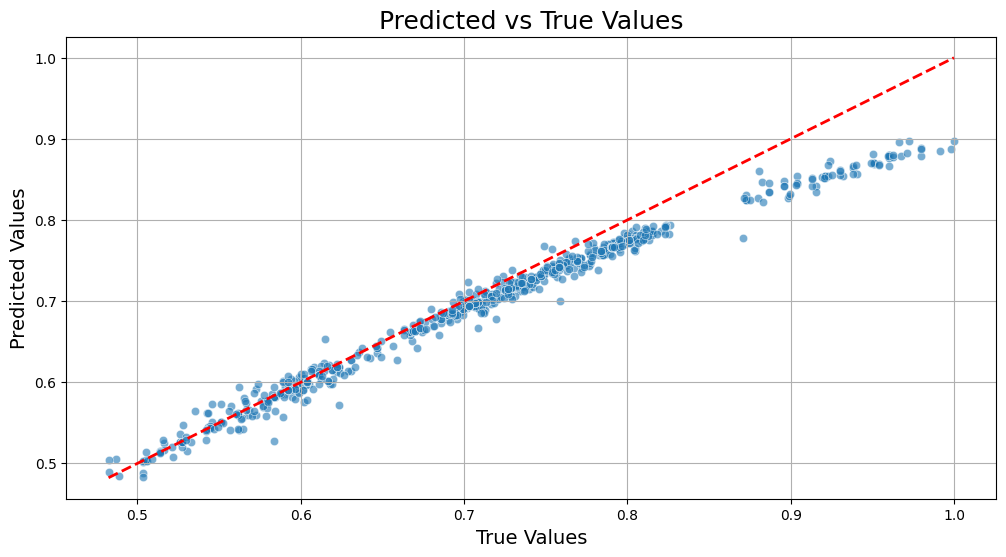

In [37]:
# 22. 예측 vs 실제 값 산점도 호출
def plot_scatter_predictions(true_values, predicted_values):
    # HTML 설명
    html_content = '''
    <div style="border: 3px solid #4CAF50; border-radius: 15px; padding: 20px; background-color: #f1f8f4; font-family: 'Arial', sans-serif;">
        <h2 style="color: #4CAF50; text-align: center;">🔍 예측 vs 실제 값 산점도</h2>
        <p style="font-size: 18px; line-height: 1.8; color: #333;">
            예측 값과 실제 값을 비교하는 산점도는 모델의 예측 정확도를 시각적으로 평가할 수 있는 강력한 도구입니다.
            이 그래프는 예측된 값과 실제 값 간의 관계를 나타내며, 데이터 포인트가 대각선에 가까울수록 모델의 예측이 더 정확하다는 것을 의미합니다.
            <br><br>
            <strong>주요 포인트:</strong>
            <ul style="font-size: 16px;">
                <li>대각선에 가까울수록 모델의 예측이 더 정확합니다.</li>
                <li>산점도를 통해 예측 오차 패턴을 시각적으로 분석할 수 있습니다.</li>
            </ul>
            이 그래프는 모델이 예측한 값과 실제 값 사이의 일치도를 직관적으로 확인하는 데 유용합니다.
        </p>
    </div>
    '''
    display(HTML_display(html_content))

    plt.figure(figsize=(12, 6))
    plt.scatter(true_values, predicted_values, alpha=0.6, edgecolors='w', linewidth=0.5)
    plt.plot([true_values.min(), true_values.max()], [true_values.min(), true_values.max()], 'r--', linewidth=2)
    plt.title('Predicted vs True Values', fontsize=18)
    plt.xlabel('True Values', fontsize=14)
    plt.ylabel('Predicted Values', fontsize=14)
    plt.grid(True)
    plt.show()

# 예측 vs 실제 값 산점도 호출
plot_scatter_predictions(pd.Series(y_test, index=adjusted_dates), pd.Series(y_test_pred.flatten(), index=adjusted_dates))